In [1]:
%matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re

##NS Packages
from geopy.geocoders import Nominatim
import time
import gmaps
import gmaps.datasets
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import squarify


color = (65/255,174/255,189/255)
treemap_size = (20,20)
wordcloud_size = (30,15)
barchart_size = (30,15)
fontvalue = 20

Aijobsindustry_dataset = pd.read_csv("AIJobsIndustry_Clean_v3.csv")
print(f"No of rows in Aijobsindustry_dataset is {Aijobsindustry_dataset.shape[0]}")

Dice_us_jobs_dataset = pd.read_csv("Dice_US_jobs_Clean_v4.csv", encoding="cp437")
print(f"No of rows in Dice_us_jobs_dataset is {Dice_us_jobs_dataset.shape[0]}")

monster_dataset = pd.read_csv("Monster_Clean.csv")
print(f"No of rows in monster_dataset is {monster_dataset.shape[0]}")

indeed_dataset = pd.read_csv("alldata_Clean_v3.csv")
print(f"No of rows in indeed_dataset is {indeed_dataset.shape[0]}")

multi_src_dataset = pd.read_csv("cleanedandfilteredUSJobs.csv")
print(f"No of rows in multiple source data set is {multi_src_dataset.shape[0]}")

dice_tech_filtered = pd.read_csv("Dice_US_Tech_FilteredJobData.csv")
print(f"No of rows in dice_tech_filtered is {dice_tech_filtered.shape[0]}")

print(f"No of rows in final merged data set should be {Aijobsindustry_dataset.shape[0]+multi_src_dataset.shape[0]+Dice_us_jobs_dataset.shape[0]+monster_dataset.shape[0]+indeed_dataset.shape[0]+dice_tech_filtered.shape[0]}")

#list that puts all the files open into a list that will be used in the concat function
datasets_to_merge = [Aijobsindustry_dataset,Dice_us_jobs_dataset,monster_dataset,indeed_dataset,dice_tech_filtered,multi_src_dataset]

#concat function to concat all the datatables to one
merged_dataset = pd.concat(datasets_to_merge, sort=False)
print(f"Actual no of rows in merged_dataset is {merged_dataset.shape[0]}")

Using matplotlib backend: Qt5Agg
No of rows in Aijobsindustry_dataset is 631
No of rows in Dice_us_jobs_dataset is 1265
No of rows in monster_dataset is 162
No of rows in indeed_dataset is 6953
No of rows in multiple source data set is 207
No of rows in dice_tech_filtered is 1566
No of rows in final merged data set should be 10784
Actual no of rows in merged_dataset is 10784


In [2]:
merged_dataset.head()

Position     Company Description  \
0  Data Science Development Program- Junior Data ...  MassMutual         NaN   
1  Entry-Level Cognitive / AI / Machine Learning ...         IBM         NaN   
2                               PHP/MySQL Programmer         NaN         NaN   
3                              Python Programmer Job        SAIC         NaN   
4                                         BI Analyst         NaN         NaN   

  Loc_state       Loc_city Skills Type Source  
0        MA        Amherst    NaN  NaN    NaN  
1        TX         Austin    NaN  NaN    NaN  
2        TX         Austin    NaN  NaN    NaN  
3        CA       Monterey    NaN  NaN    NaN  
4        CA  San Francisco    NaN  NaN    NaN

In [3]:
merged_dataset.to_csv("final_dataframe.csv")

In [4]:
skill_list =['data analysis','machine learning','statistics','computer science','communication','mathematics', 'visualization', 'ai',\
             'deep learning', 'nlp', 'software development','neural networks', 'project management', 'software engineering', \
              'data engineering','bi','modeling','etl','statistical analysis','research','deep learning','interpersonal skills',\
            'web scraping','neural network','decision tree','random forest','testing']
tool_list = ['python','r','sql','hadoop','spark','java','sas','tableau','hive','scala','aws','c++','matlab',\
             'c','excel','nosql','linux','vba','json','numpy','pandas','matplotlib','api','mysql','mongodb','html','css',\
             'java script','ajax','d3','leaflet','matlab']
edu_list = ['bachelor','bachelors','master','masters','phd','post graduation','graduation','high school','bs','ms','ba','ma']

In [5]:
# Viv - the code can be improved to bring effeciency and can have a function to do the reg expression, howver for now use this and we can make improvements later
description = merged_dataset['Description']
skills = merged_dataset['Skills']
title = merged_dataset['Position']
desc_skills = description.append(skills)
parse_list = description.append(title)
skill_count = {}
tool_count = {}
edu_count = {}
no_edu_count = 0
for entry in parse_list:
    try:
        entry = re.sub('[./\n\r(),:-]', ' ', str(entry))
#        print(entry)
        entry = re.sub('[^A-Za-z0-9+ ]', '', str(entry)).lower()
        entry = re.sub('data analytics', 'data analysis', str(entry))
        entry = re.sub('artificial intelligence', 'ai', str(entry))
#        print(entry)
        for skill in skill_list:
            if (f' {skill} ' in f' {entry} '):
                if skill not in skill_count:
                    skill_count[skill] = 1
                else:
                    skill_count[skill] += 1
        for tool in tool_list:
            if f' {tool} ' in f' {entry} ':
                if tool not in tool_count:
                    tool_count[tool] = 1
                else:
                    tool_count[tool] += 1   
    except:
        print("Skipping an entry due to bad data")
        continue
description2 = merged_dataset['Description']
for item in description2:
    try:
        item = re.sub('[./\n\r(),:-]', ' ', str(item))
        item = re.sub('[^A-Za-z0-9+ ]', '', str(item)).lower()
        item = re.sub('data analytics', 'data analysis', str(item))
        item = re.sub('artificial intelligence', 'ai', str(item))
        i = 0
        for edu in edu_list:
            if f' {edu} ' in f' {item} ':
                if edu not in edu_count:
                    edu_count[edu] = 1
                else:
                    edu_count[edu] += 1 
            else:
                i +=1
        if i==12: 
            no_edu_count +=1
    except:
        print("Skipping an entry due to bad data")
        continue
print(skill_count)
print(tool_count)
print(edu_count)
education_count = {
    'High School':edu_count['high school'],
    'Bachelors':edu_count['bachelors']+edu_count['bachelor']+edu_count['graduation']+edu_count['bs']+edu_count['ba'],
    'Masters':edu_count['masters']+edu_count['master']+edu_count['post graduation']+edu_count['ms']+edu_count['ma'],
    'Phd':edu_count['phd'],
    'No education mentioned':no_edu_count
}
print(education_count)

{'communication': 4873, 'testing': 2253, 'statistics': 2317, 'mathematics': 1367, 'research': 5532, 'software development': 1339, 'project management': 788, 'modeling': 2226, 'etl': 1314, 'interpersonal skills': 688, 'data analysis': 2469, 'visualization': 1093, 'statistical analysis': 694, 'bi': 966, 'machine learning': 3586, 'computer science': 3207, 'nlp': 402, 'software engineering': 588, 'ai': 1066, 'data engineering': 334, 'deep learning': 1378, 'neural network': 48, 'neural networks': 301, 'web scraping': 14, 'decision tree': 29, 'random forest': 72}
{'sql': 4199, 'sas': 867, 'excel': 1352, 'html': 414, 'css': 372, 'python': 3987, 'linux': 982, 'tableau': 853, 'c': 1321, 'java': 2099, 'api': 451, 'java script': 25, 'json': 184, 'aws': 999, 'spark': 1312, 'mongodb': 286, 'r': 2147, 'hadoop': 1748, 'hive': 808, 'c++': 1166, 'mysql': 540, 'matlab': 1242, 'vba': 152, 'nosql': 629, 'scala': 661, 'ajax': 76, 'd3': 174, 'numpy': 171, 'pandas': 201, 'matplotlib': 50, 'leaflet': 5}
{'ms'

In [6]:
#https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html
#wordcloud documentation

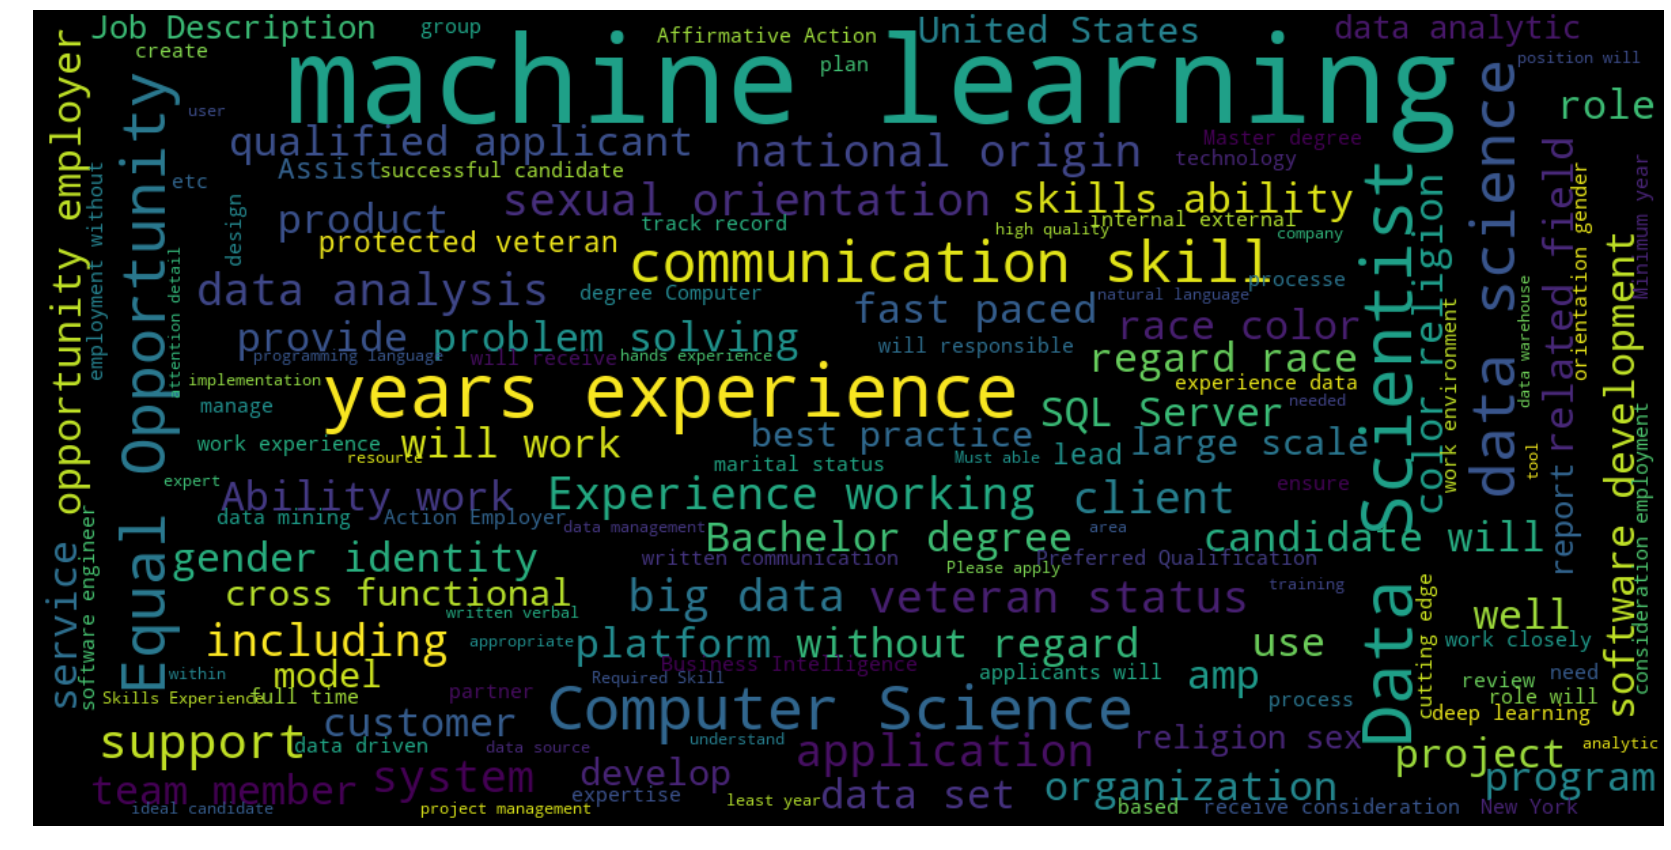

In [7]:
#Strip space to remove any miss match of state text
merged_dataset["Loc_state"] = merged_dataset["Loc_state"].str.strip()
merged_dataset
merged_dataset_stacked_bar = merged_dataset
#create a long string from the description column to feed into wordcloud
desc = merged_dataset['Description']
desc = " ".join((str(x) for x in desc))
#create the wordcloud using the string and add formating for size
wordcloud = WordCloud(scale=3,relative_scaling=1).generate(desc)
plt.figure(figsize=wordcloud_size)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("graphs/DescWordCloud.jpg")
plt.show()

In [8]:
# wordcloud.process_text(desc)

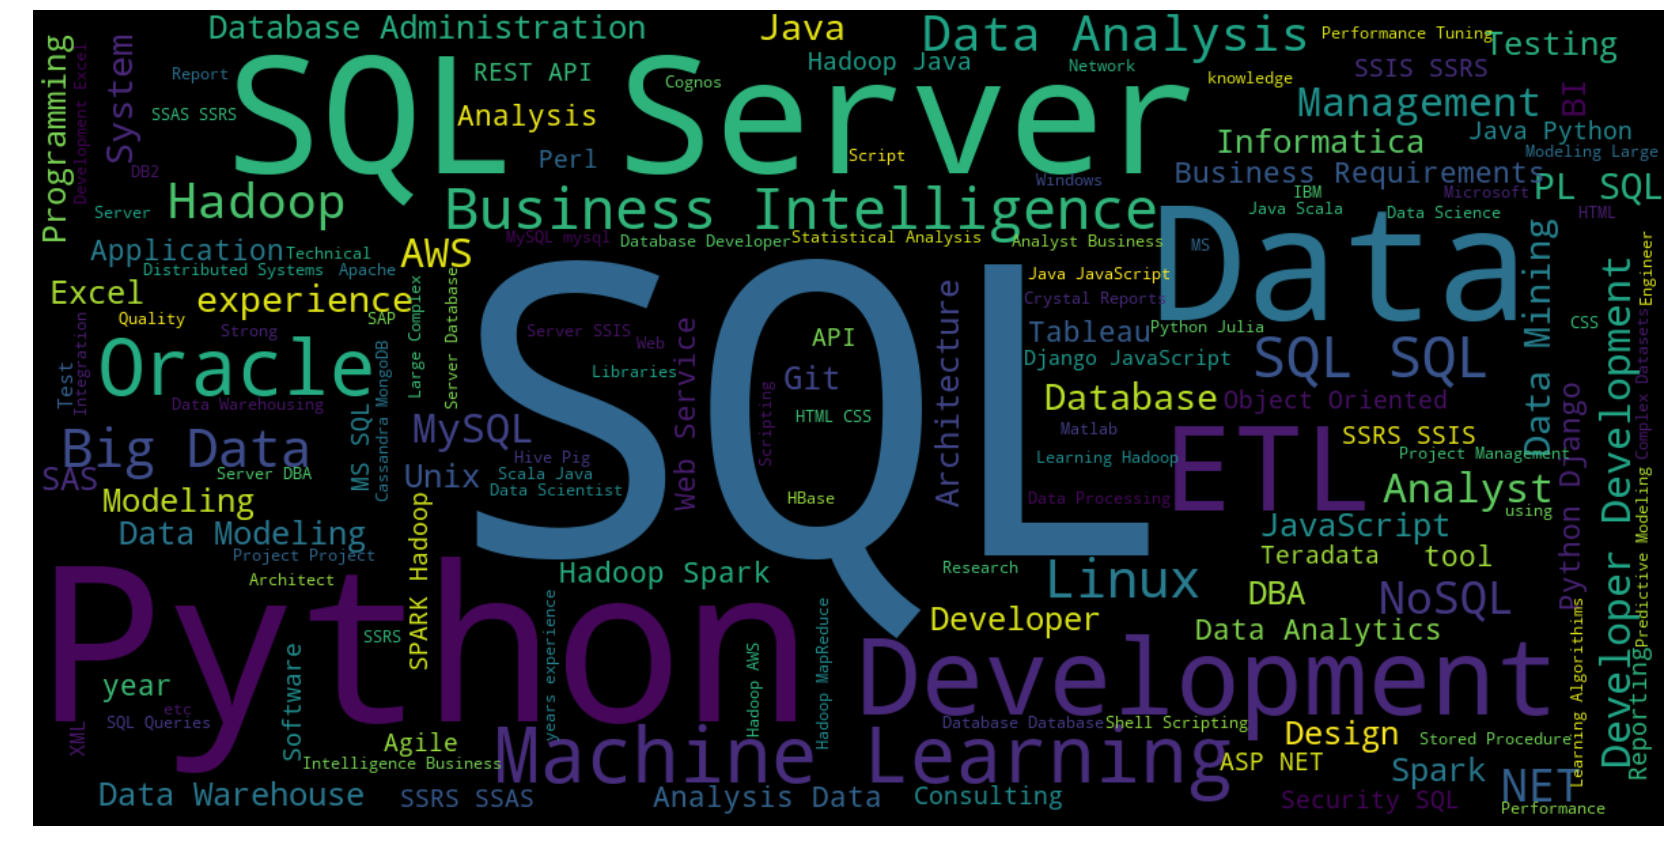

In [9]:
#define skills column to a new handle and create a long string from skills column
skills_col = merged_dataset["Skills"]
skills_col = "".join((str(x) for x in skills_col))
skills_col
#create wordcloud with the new string and save and show
wordcloud = WordCloud(max_font_size=100,scale=3,relative_scaling=1).generate(skills_col)
plt.figure(figsize=wordcloud_size)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("graphs/SkillsWordCloud.jpg")
plt.show()


In [10]:
#grouped by state to create a bar graph and pie chart to get an idea of distribution of the jobs by state
group_by_state = merged_dataset.groupby("Loc_state")
#apply aggrigrate function of count to get number of count per state and remove the extra columns to end up with counters per state
count_for_state = group_by_state.count()
count_for_state = count_for_state["Position"]
count_for_state = count_for_state.to_frame()
count_for_state = count_for_state.reset_index()
#set index of loc state for setting axies for bar and pie
count_for_state = count_for_state.set_index("Loc_state")
print(count_for_state)

           Position
Loc_state          
AL                5
AR                6
AZ               36
CA             3102
CO              314
CT               92
DC              380
DE               12
FL              144
GA              481
HI                1
IA                9
ID                2
IL              582
IN                7
KS               11
KY               15
LA                9
MA             1545
MD               64
ME                4
MI               62
MN               43
MO               24
NC               91
NE               10
NH               23
NJ              224
NM                3
NV               10
NY             1319
OH               83
OK                3
OR               30
PA              113
QC                2
RI                9
SC               11
SD                1
TN               33
TS                1
TX              469
UT               30
VA              125
VT                2
WA             1081
WI               20
WV                1


In [11]:
#states to check against
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}


In [12]:
#Loop to check against the 50 states of US, and drop non relevant ones
found = []
notfound = []

for item in count_for_state.index.values.tolist():
    try:
        if states[item]:
#             print(f"Found state: {item}")
            found.append(item)
    except:
        notfound.append(item)
        print(f"The {item} is not a US state.")
        count_for_state.drop(item, axis= 0,inplace = True)
        print(f"Dropped column for {item}")
        
print(f"Found: {len(found)} of states")
print(f"Did not find:{notfound}")

The QC is not a US state.
Dropped column for QC
The TS is not a US state.
Dropped column for TS
Found: 46 of states
Did not find:['QC', 'TS']


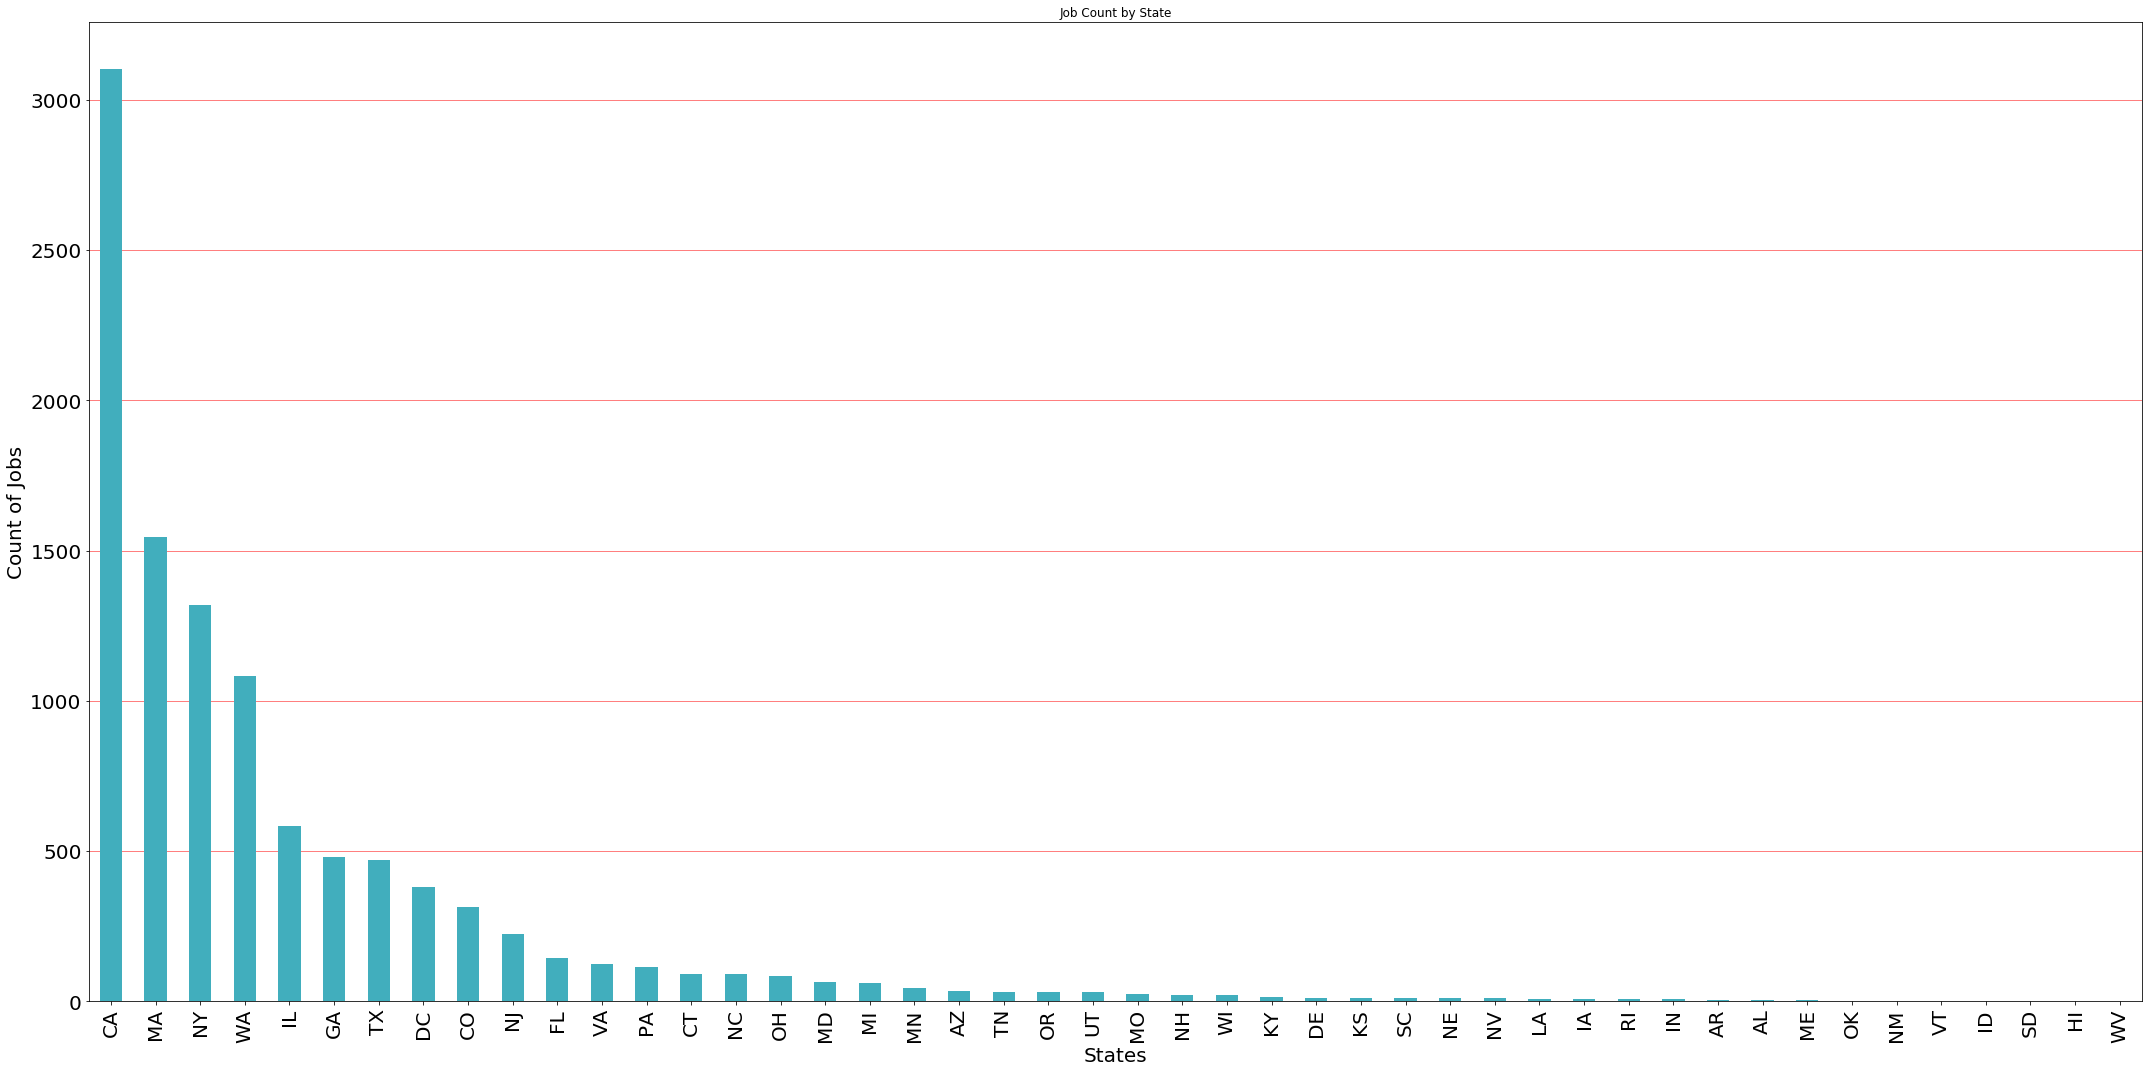

In [13]:
count_for_state
count_for_state = count_for_state.sort_values("Position", ascending=False)
count_for_state_store = count_for_state
count_for_state.plot.bar(figsize=barchart_size,legend=False, color = color, zorder=2.5)
plt.xticks(rotation=90,size=fontvalue)
plt.yticks(size=fontvalue)
plt.title("Job Count by State")
plt.xlabel("States",size=fontvalue)
plt.ylabel("Count of Jobs",size=fontvalue)
plt.grid(linestyle='-', linewidth='0.5', color='red', axis='y')
plt.tight_layout()
plt.savefig("graphs/BarOfCountofJobsUS.jpg")
plt.show()

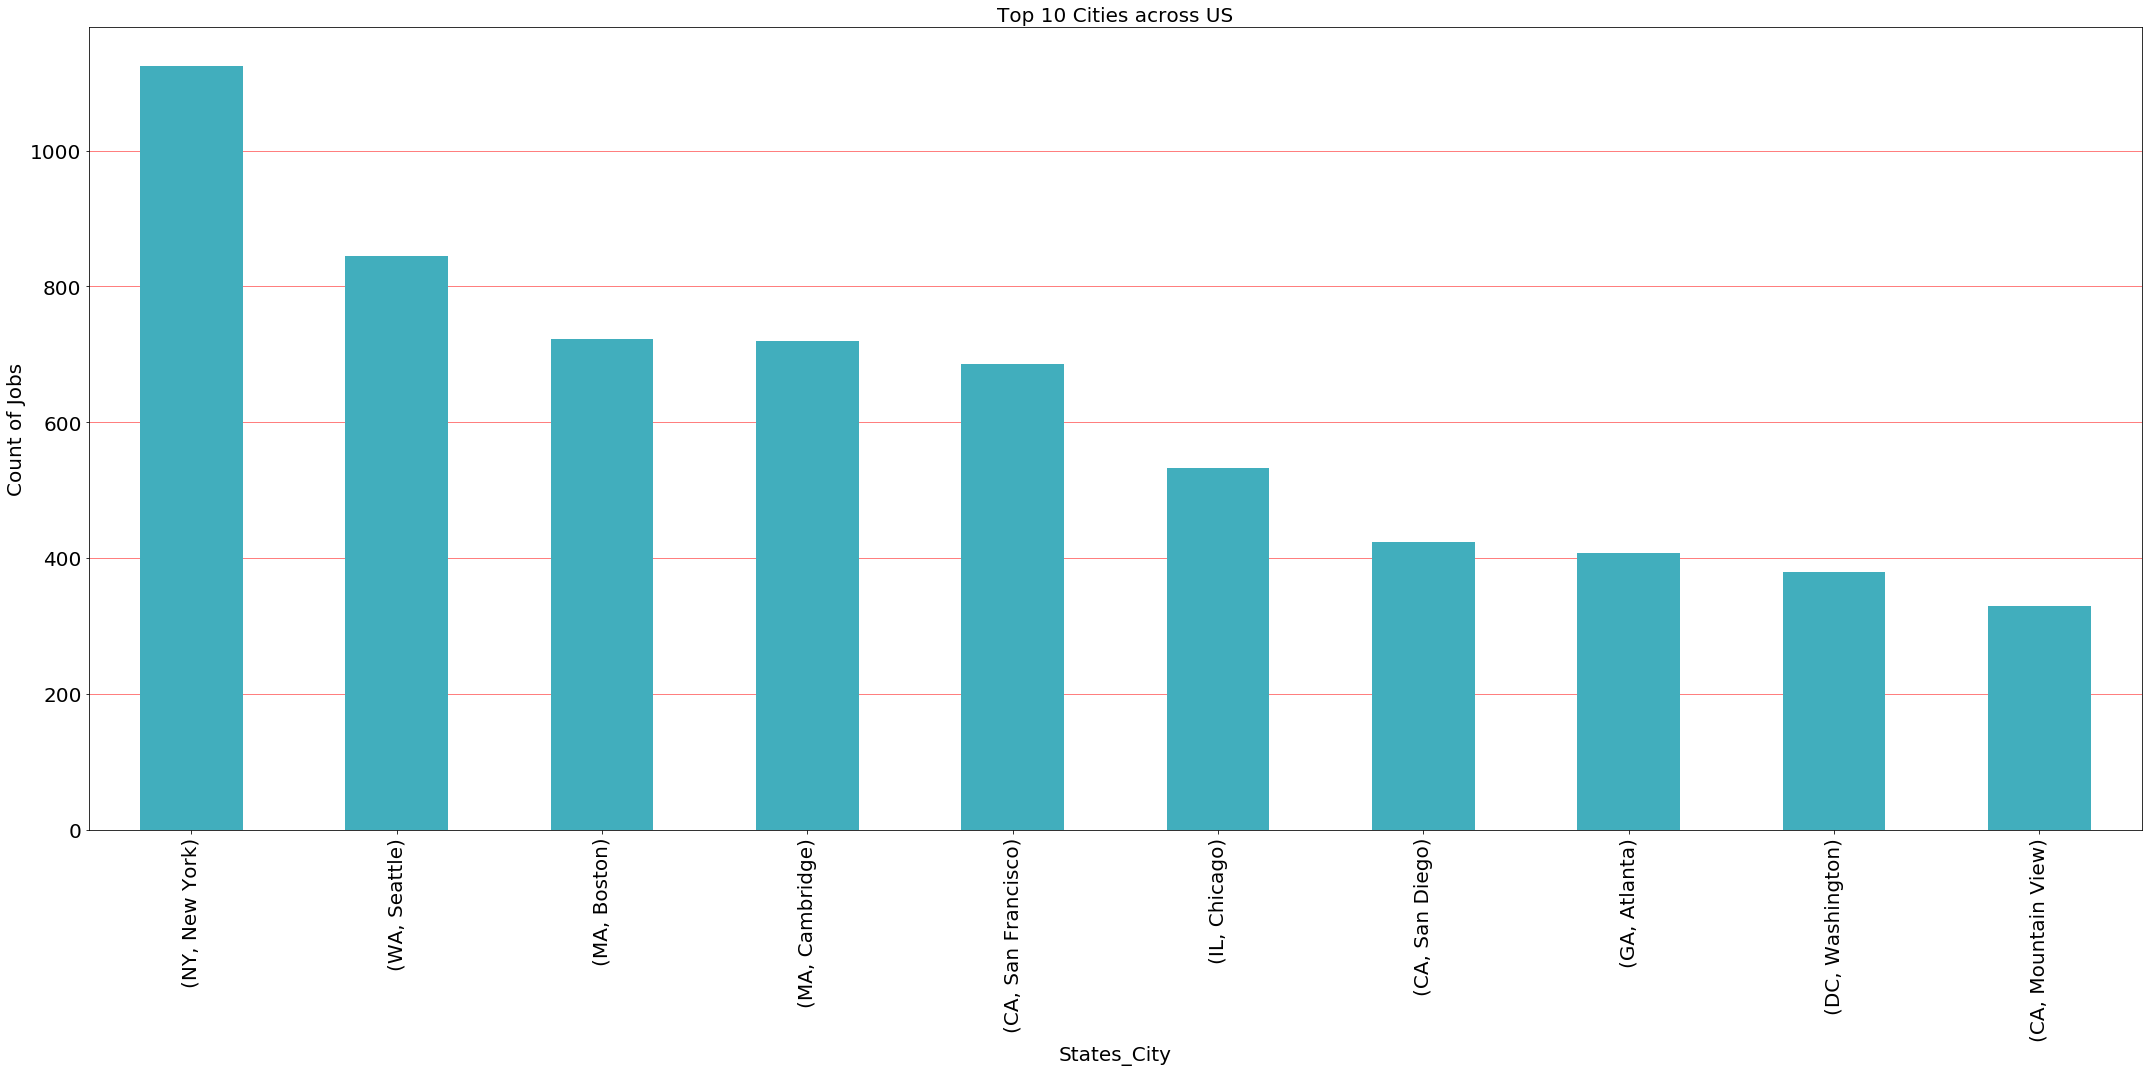

In [14]:
colors_for_cities =["salmon","green","lightsteelblue","lightsteelblue","goldenrod","teal","goldenrod","sienna","plum","goldenrod"]
merged_dataset_stacked_bar_grouped = merged_dataset_stacked_bar.groupby(["Loc_state","Loc_city"])
merged_dataset_stacked_bar_grouped_count = merged_dataset_stacked_bar_grouped.count()
merged_dataset_stacked_bar_grouped_count = merged_dataset_stacked_bar_grouped_count["Position"]
merged_dataset_stacked_bar_grouped_count
merged_dataset_stacked_bar_grouped_count_sorted = merged_dataset_stacked_bar_grouped_count.sort_values(ascending=False)
# merged_dataset_stacked_bar_grouped_count_sorted = merged_dataset_stacked_bar_grouped_count.sort_values()
merged_dataset_stacked_bar_grouped_count_sorted
merged_dataset_stacked_bar_grouped_count_sorted_head = merged_dataset_stacked_bar_grouped_count_sorted.head(10)
merged_dataset_stacked_bar_grouped_count_sorted_head.plot.bar(figsize=barchart_size,stacked=True, color=color,zorder=2.5)
# merged_dataset_stacked_bar_grouped_count_sorted_head.plot.bar(figsize=(30,15),stacked=True, color=color)
plt.grid(linestyle='-', linewidth='0.5', color='red', axis='y')
plt.xticks(rotation=90, size = fontvalue)
plt.yticks(size=fontvalue)
merged_dataset_stacked_bar_grouped_count_sorted_head
plt.title("Top 10 Cities across US",size = fontvalue)
plt.xlabel("States_City",size = fontvalue)
plt.ylabel("Count of Jobs",size = fontvalue)
plt.tight_layout()
plt.savefig("graphs/BarOfStateandCities.jpg")
plt.show()



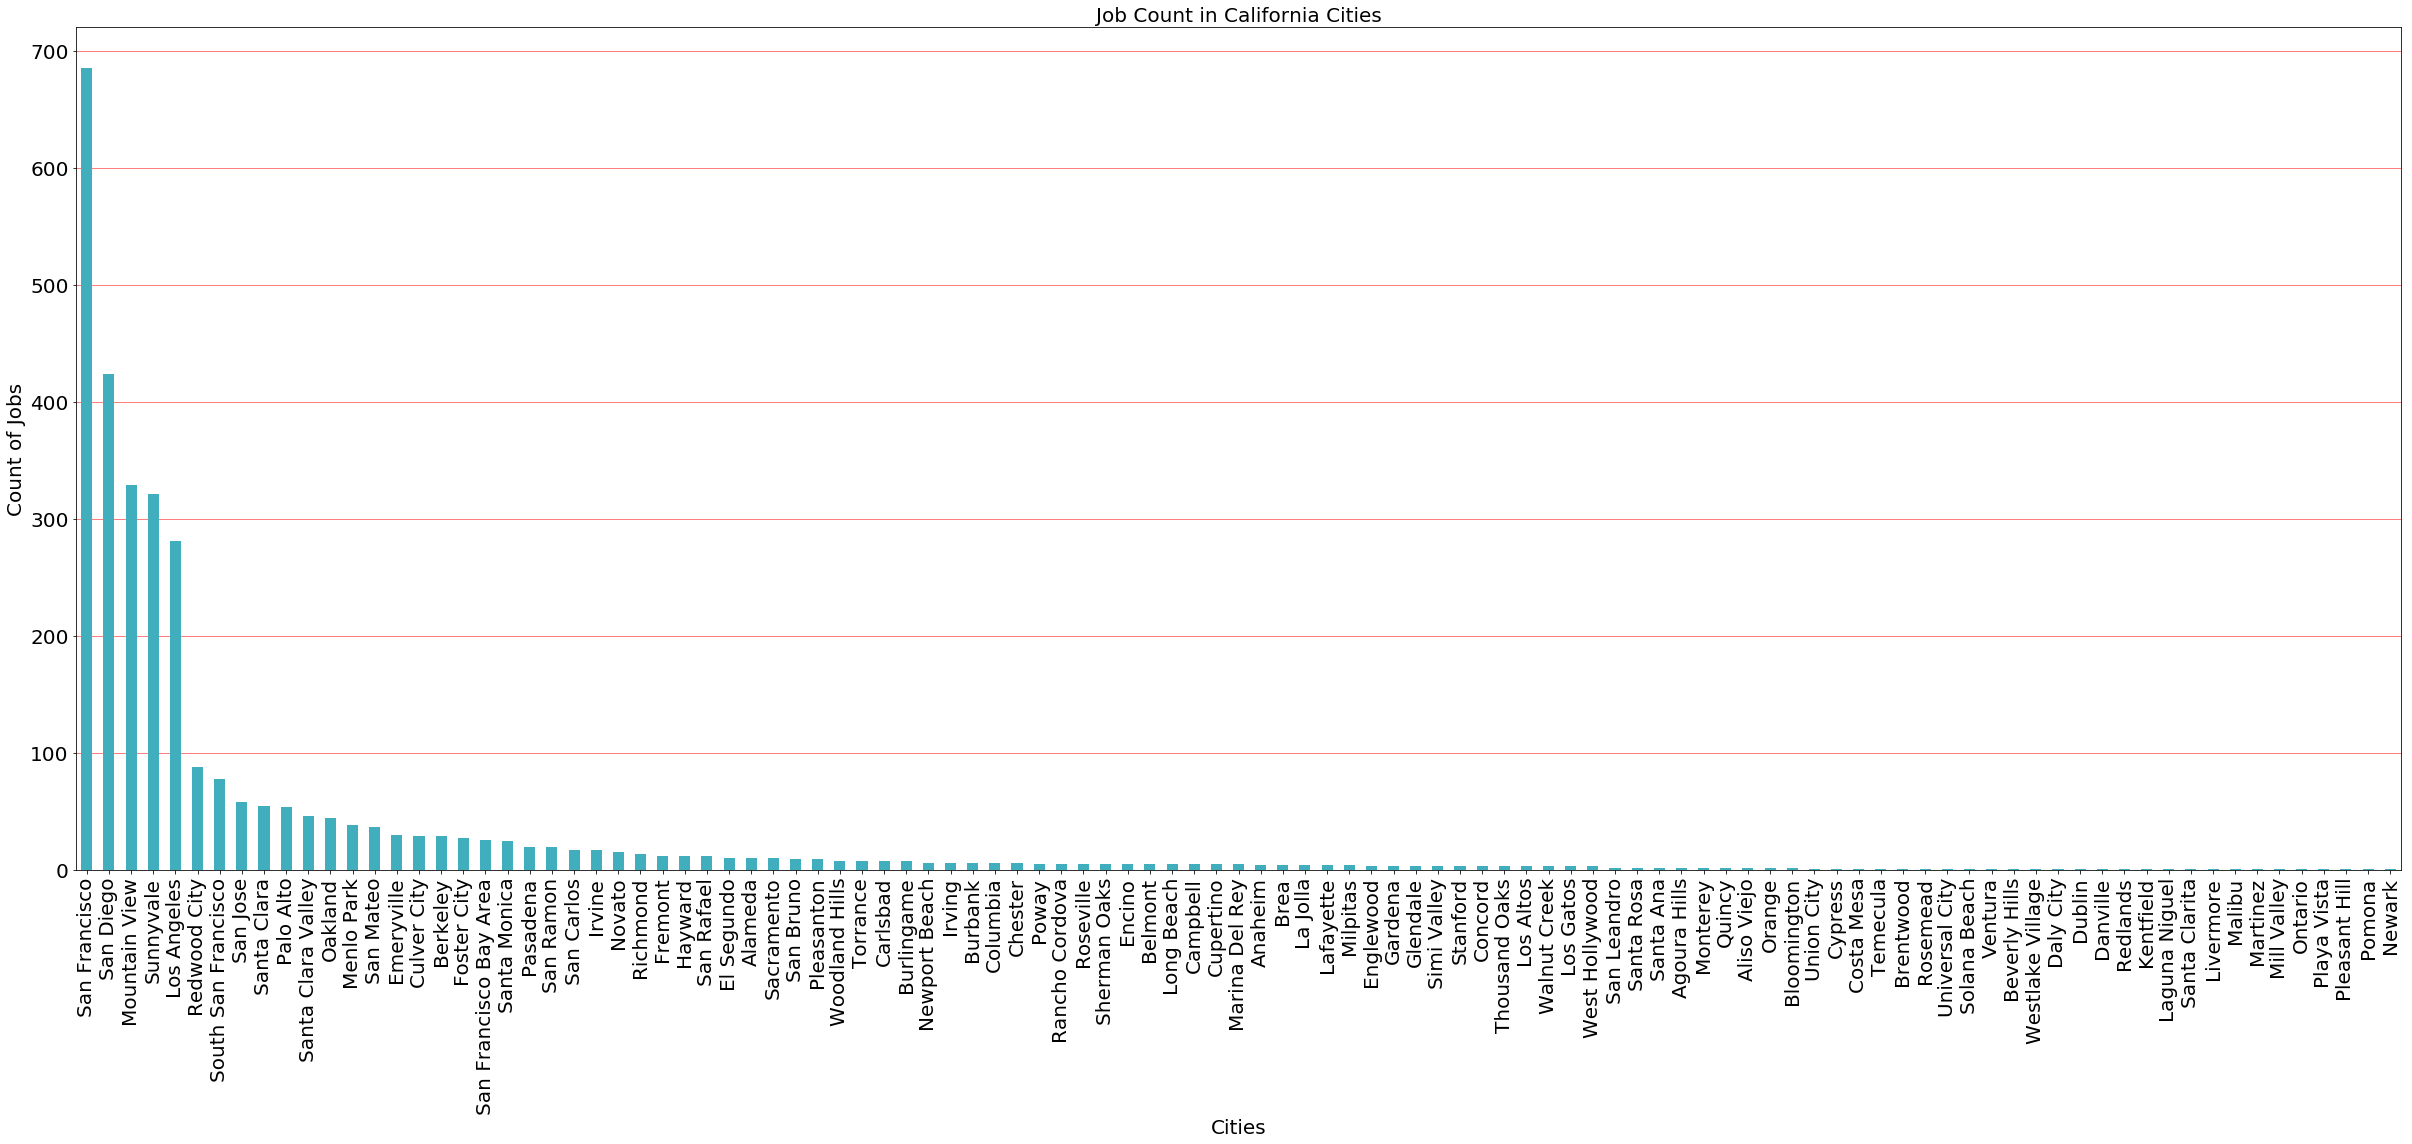

In [15]:
california_data_set = merged_dataset.loc[merged_dataset["Loc_state"] == "CA"]
california_data_set
california_data_set_grouped_by_city = california_data_set.groupby("Loc_city")
count_for_california = california_data_set_grouped_by_city.count()
count_for_california = count_for_california["Position"]
count_for_california = count_for_california.to_frame()
# count_for_california = count_for_california.reset_index()
count_for_california
count_for_california = count_for_california.sort_values(["Position"], ascending=False )
count_for_california
# fig = plt.figure(figsize=(60,10))
count_for_california.plot.bar(figsize=(11.20*3,4*4),legend=False, color=color,zorder=2.5)
# count_for_california.plot.bar(x = count_for_california["Loc_city"], y = ["Position"].sort_values(ascending=False))
# # plt.bar(count_for_california["Loc_city"],count_for_california["Position"], align='center', width=0.5,)

plt.xticks(rotation=90,size=fontvalue)
plt.yticks(size=fontvalue)
plt.title("Job Count in California Cities",size = fontvalue)
plt.xlabel("Cities",size = fontvalue )
plt.ylabel("Count of Jobs",size = fontvalue)

#Labels
# for i, v in enumerate(count_for_california["Position"]):
# #     print(f"value of i: {i}, value of v: {v}")
#     plt.text(i - .2, v + 1 , str(v), color='black', fontweight='bold')
plt.grid(linestyle='-', linewidth='0.5', color='red',axis='y')
plt.tight_layout()
plt.savefig("graphs/BarOfCountofJobsCA.jpg")
plt.show()

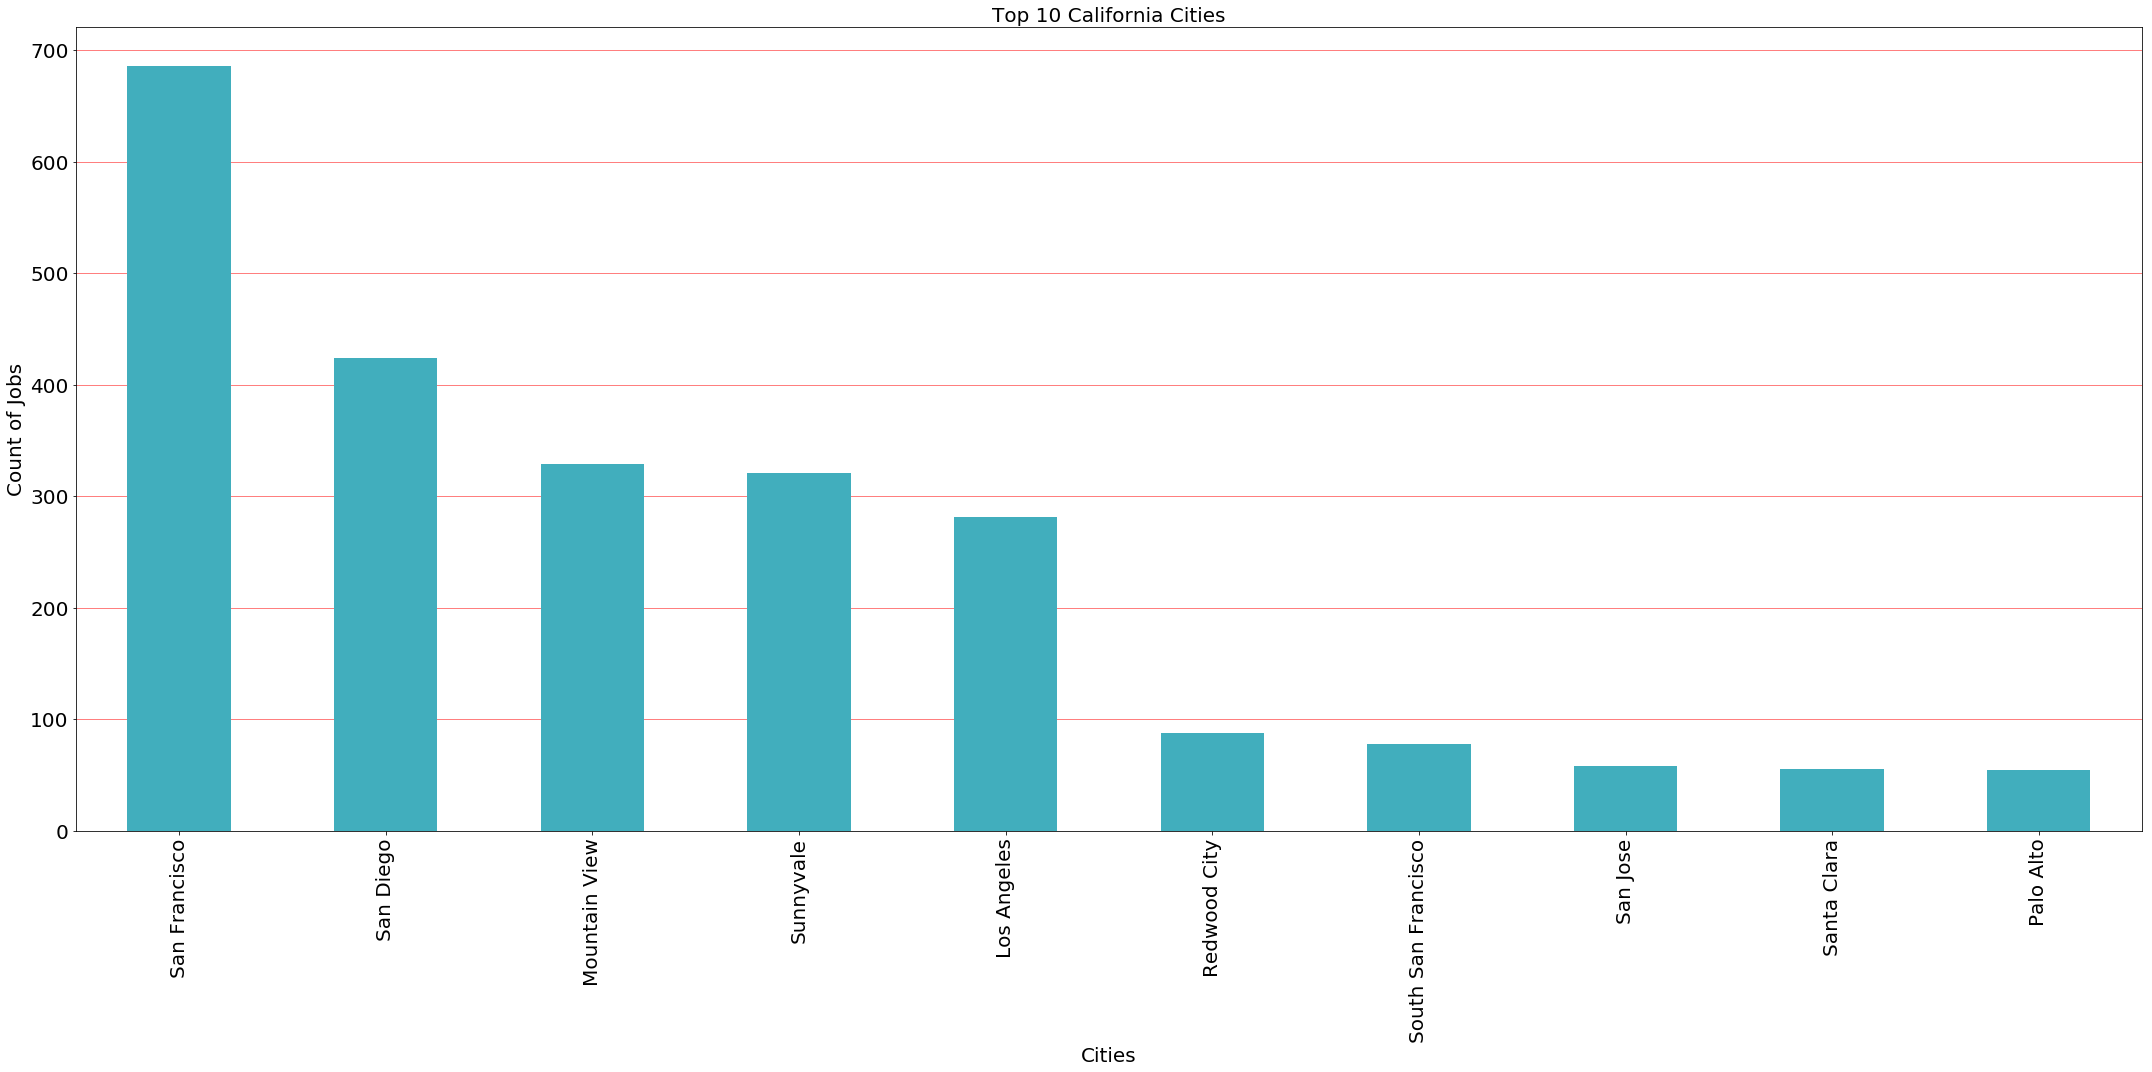

In [16]:
# count_for_california = count_for_california.sort_values(["Position"], ascending=False )
# count_for_california = count_for_california.set_index("Loc_city")
# count_for_california
count_for_california_top10 = count_for_california[0:10]
count_for_california_top10

count_for_california_top10.plot.bar(figsize=barchart_size,legend=False, color=color,zorder=2.5)
# count_for_california.plot.bar(x = count_for_california["Loc_city"], y = ["Position"].sort_values(ascending=False))
# # plt.bar(count_for_california["Loc_city"],count_for_california["Position"], align='center', width=0.5,)

plt.xticks(rotation=90,size=fontvalue)
plt.yticks(size=fontvalue)

plt.title("Top 10 California Cities",size = fontvalue)
plt.xlabel("Cities",size = fontvalue )
plt.ylabel("Count of Jobs",size = fontvalue)

# sortedvalue = count_for_california["Position"].sort_values(ascending=False)
# for i, v in enumerate(count_for_california_top10["Position"]):
# #     print(f"value of i: {i}, value of v: {v}")
#     plt.text(i - .2, v + 1 , str(v), color='black', fontweight='bold')

plt.grid(linestyle='-', linewidth='0.5', color='red', axis='y',zorder=2.5)
plt.tight_layout()
plt.savefig("graphs/BarOfCountofJobsCA_top10.jpg")
plt.show()

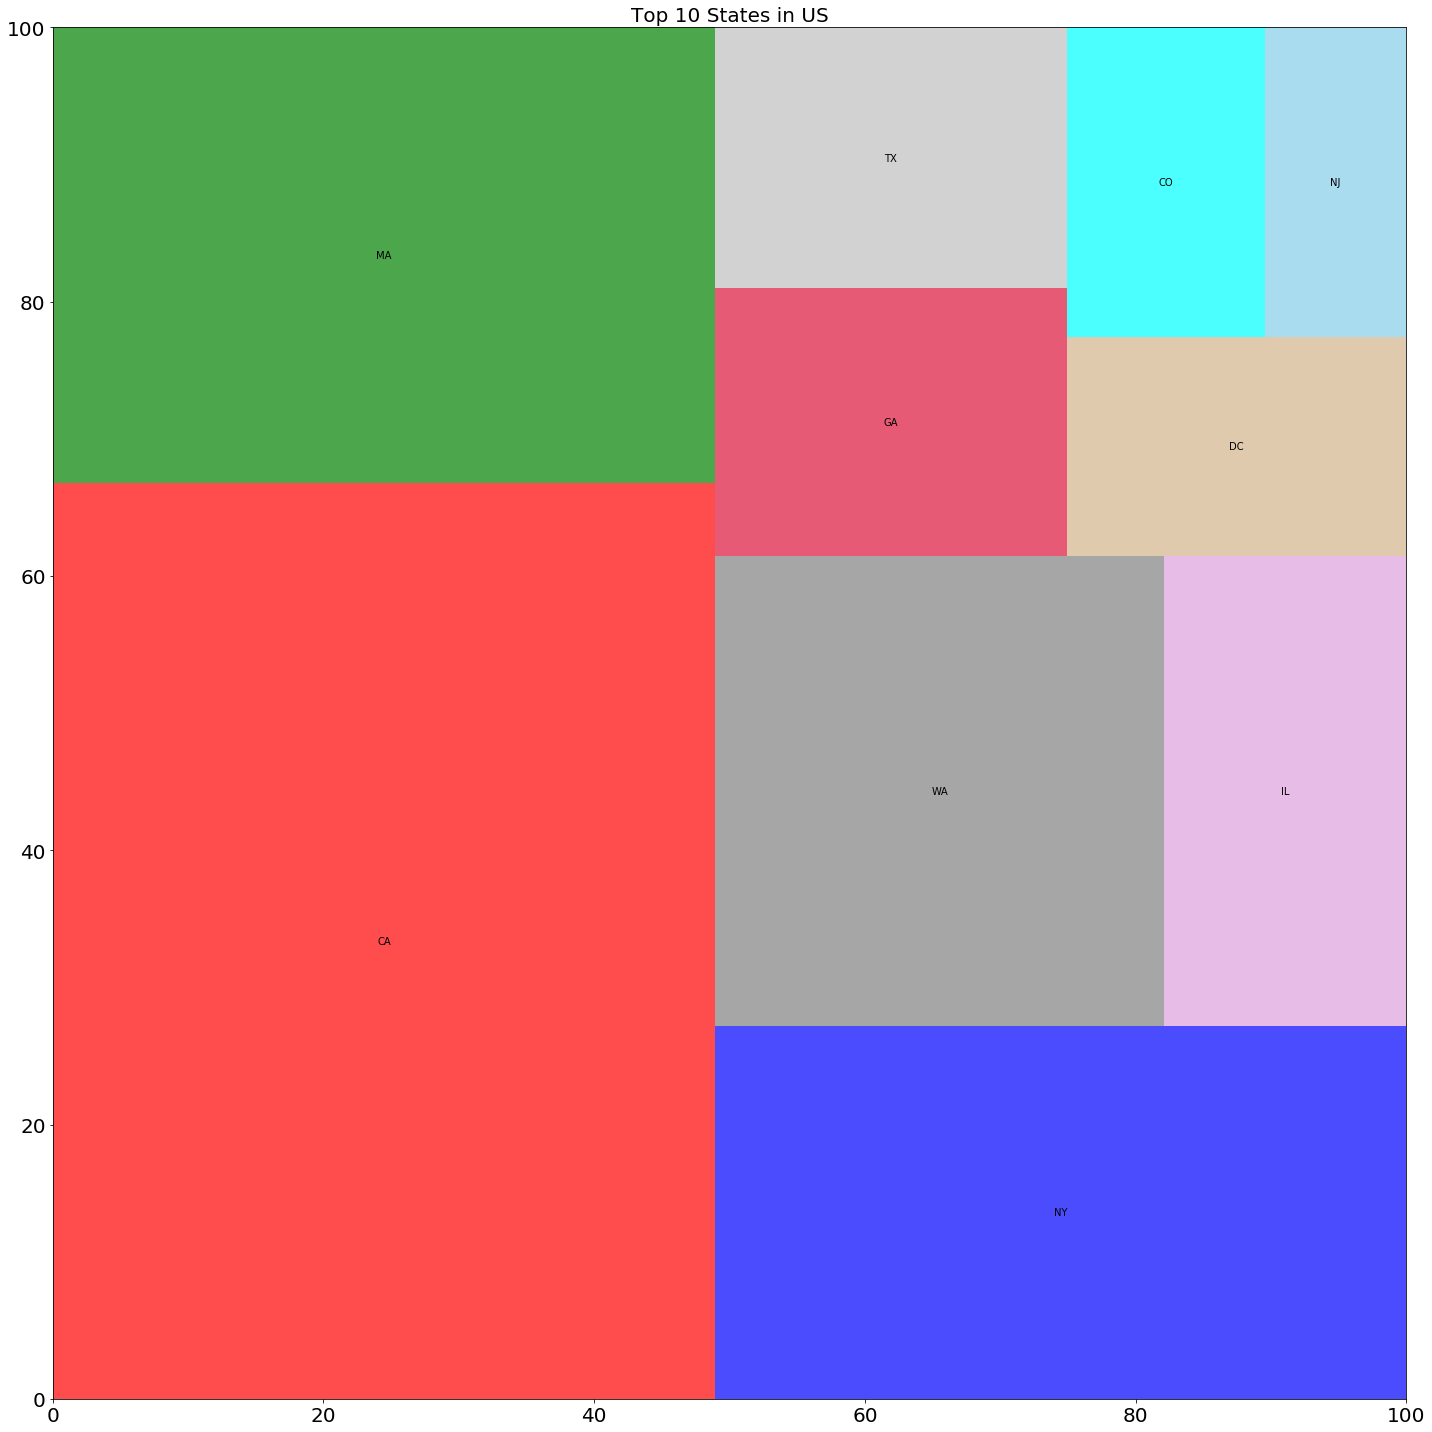

In [17]:
count_for_state = count_for_state.reset_index()

plt.figure(figsize=treemap_size)
squarify.plot(sizes=count_for_state["Position"].head(10), label =count_for_state["Loc_state"].head(10), alpha =.7,color=["red","green","blue", "grey","plum","crimson","silver","tan","cyan","skyblue"])
# plt.pie(count_for_state["Position"].head(10), labels=count_for_state["Loc_state"].head(10),rotatelabels=True, autopct=make_autopct(count_for_state["Position"]),labeldistance=1.1)
# plt.savefig("PieOfCountofJobsUS.jpg")
plt.title("Top 10 States in US", size = fontvalue)
# plt.rc('font', size=fontvalue)
plt.xticks(size=fontvalue)
plt.yticks(size=fontvalue)
# plt.rc('legend',fontsize=fontvalue )
plt.tight_layout()
plt.savefig("graphs/TreeMapofTop10states.jpg")
plt.show()



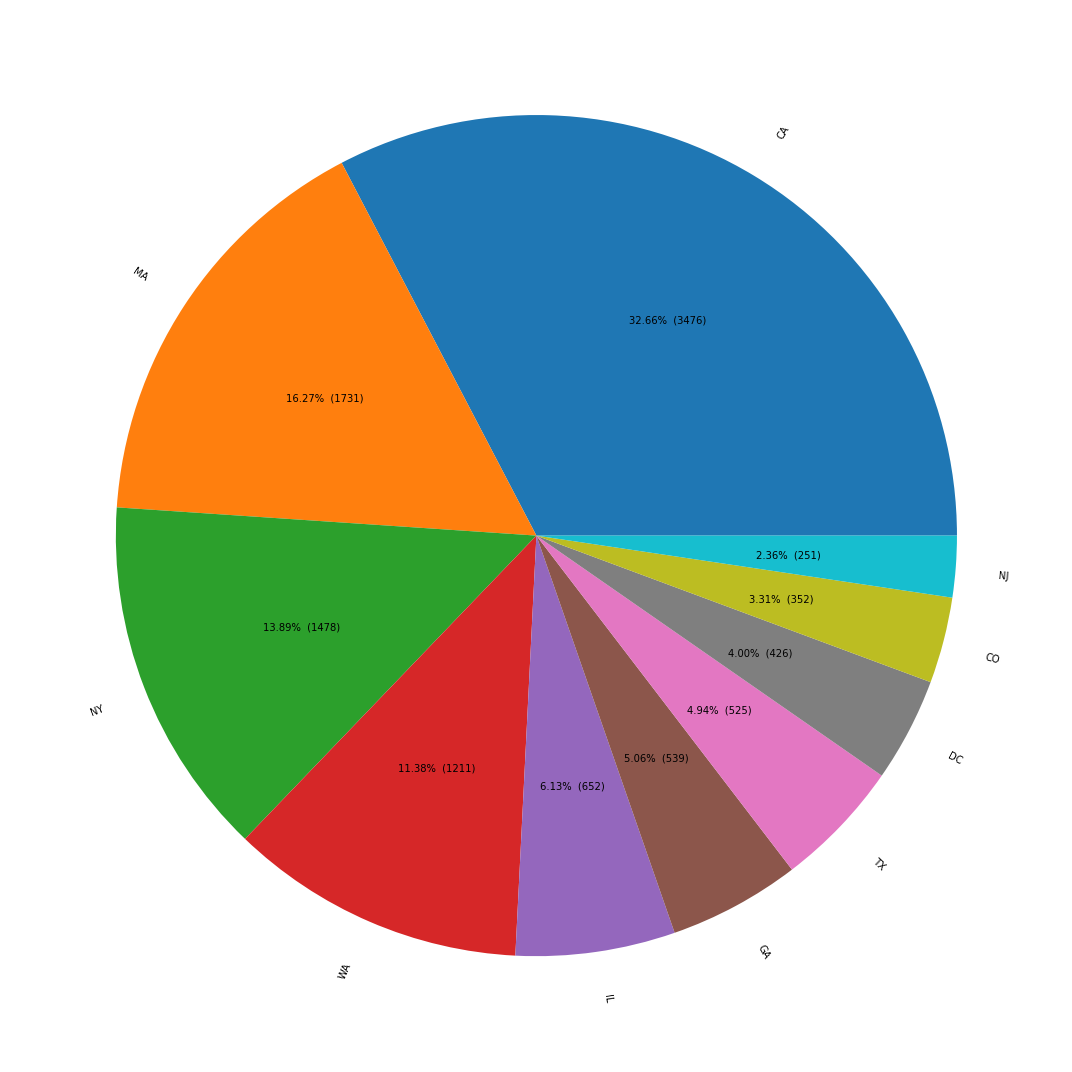

In [18]:
#PieChart
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
# count_for_state = count_for_state.reset_index()
plt.figure(figsize=[30,15])

plt.pie(count_for_state["Position"].head(10), labels=count_for_state["Loc_state"].head(10),rotatelabels=True, autopct=make_autopct(count_for_state["Position"]),labeldistance=1.1)
plt.tight_layout()
plt.savefig("graphs/PieOfCountofJobsUS.jpg")

In [19]:
# print(title)
job_type = ['administrator','tester','coordinator','designer','engineer','modeler',\
           'product manager','program manager','project manager','researcher','system analyst','analyst','scientist','developer']
job_level = ['senior','midlevel','junior']
job_type_count = {}
job_level_count = {}
for entry in title:
   try:
       #substituting job_types with meaningful names
       entry = re.sub('[./\n\r(),:-]', ' ', str(entry))
       entry = re.sub('[^A-Za-z0-9+ ]', '', str(entry)).lower()
       entry = re.sub('(admin)', 'administrator', str(entry))
       entry = re.sub('(analysis|analytical|analytics)', 'analyst', str(entry))
       entry = re.sub('(design)', 'designer', str(entry))
       entry = re.sub('(dev|developers|devops|programmer)', 'developer', str(entry))
       entry = re.sub('(engineering|engineerscientist)', 'engineer', str(entry))
       entry = re.sub('(modeler)', 'modeler', str(entry))
#         entry = re.sub('(product)', 'product manager', str(entry))
#         entry = re.sub('(program)', 'program manager', str(entry))
#         entry = re.sub('(project)', 'project manager', str(entry))
       entry = re.sub('(research)', 'researcher', str(entry))
       entry = re.sub('(science|sciences|scientific|scientistengineer)', 'scientist', str(entry))
       entry = re.sub('(system|systems)', 'system analyst', str(entry))
       entry = re.sub('(automation|qa)', 'tester', str(entry))
       #substituting job levels with meaningful names
       entry = re.sub('(associate|intern|assistant|jr|assistant|entry|student)', 'junior', str(entry))
       entry = re.sub('(manager|lead|architect|program|mid|manager|mgr)', 'midlevel', str(entry))
       entry = re.sub('(sr|director|principal|executive|vp|president|chief|vice)', 'senior', str(entry))
       for type in job_type:
           if (f' {type} ' in f' {entry} '):
               if type not in job_type_count:
                   job_type_count[type] = 1
               else:
                   job_type_count[type] += 1
               for level in job_level:
                   if f' {level} ' in f' {entry} ':
                       job_type_level = type+'_'+level
                       if job_type_level not in job_level_count:
                           job_level_count[job_type_level] = 1
                       else:
                           job_level_count[job_type_level] += 1
   except:
       print("Skipping an entry due to bad data")
       continue
print(job_type_count)
print(job_level_count)

{'scientist': 3436, 'developer': 115, 'analyst': 2002, 'engineer': 2071, 'modeler': 22, 'researcher': 1133, 'tester': 108, 'designer': 40, 'administrator': 27, 'system analyst': 54, 'coordinator': 59}
{'scientist_midlevel': 240, 'scientist_junior': 340, 'analyst_senior': 393, 'engineer_junior': 74, 'engineer_senior': 585, 'scientist_senior': 1008, 'analyst_junior': 99, 'modeler_junior': 1, 'researcher_junior': 243, 'developer_junior': 4, 'analyst_midlevel': 130, 'engineer_midlevel': 127, 'system analyst_midlevel': 2, 'tester_midlevel': 7, 'administrator_senior': 3, 'developer_senior': 43, 'researcher_senior': 213, 'researcher_midlevel': 55, 'designer_senior': 13, 'system analyst_senior': 11, 'developer_midlevel': 8, 'designer_junior': 2, 'coordinator_midlevel': 3, 'coordinator_senior': 3, 'designer_midlevel': 4, 'coordinator_junior': 5, 'tester_senior': 12, 'tester_junior': 3, 'modeler_senior': 1, 'modeler_midlevel': 1, 'administrator_midlevel': 1}


In [20]:
stack_bar_frame =pd.DataFrame({"Job":[],
                               "senior":[],
                              "midlevel":[],
                              "junior":[]})
for job in job_type_count:
    senior_count = 0
    midlevel_count = 0
    junior_count = 0
#     print(job)    
    for lvl in job_level_count:
        to_check = lvl.split("_")
        if job == to_check[0]:
#             print(to_check)
            if to_check[1] == "midlevel":
                midlevel_count = job_level_count[lvl]
            if to_check[1] == "junior":
                junior_count = job_level_count[lvl]
            if to_check[1] == "senior":
                senior_count = job_level_count[lvl]     
    toappend={"Job":job,
                  "senior":senior_count,
                  "midlevel":midlevel_count,
                  "junior":junior_count}
#     print(toappend)
    stack_bar_frame = stack_bar_frame.append(toappend,ignore_index=True)
#         print(lvl)
#     stack_bar_frame[items] = job_type_count[items]
#     stack_bar_frame
#     print(items)
# #     print(job_type_count[items])
# stack_bar_frame["total"] = job_type_count[""] 
job_type_count

stack_bar_frame



Job  senior  midlevel  junior
0        scientist  1008.0     240.0   340.0
1        developer    43.0       8.0     4.0
2          analyst   393.0     130.0    99.0
3         engineer   585.0     127.0    74.0
4          modeler     1.0       1.0     1.0
5       researcher   213.0      55.0   243.0
6           tester    12.0       7.0     3.0
7         designer    13.0       4.0     2.0
8    administrator     3.0       1.0     0.0
9   system analyst    11.0       2.0     0.0
10     coordinator     3.0       3.0     5.0

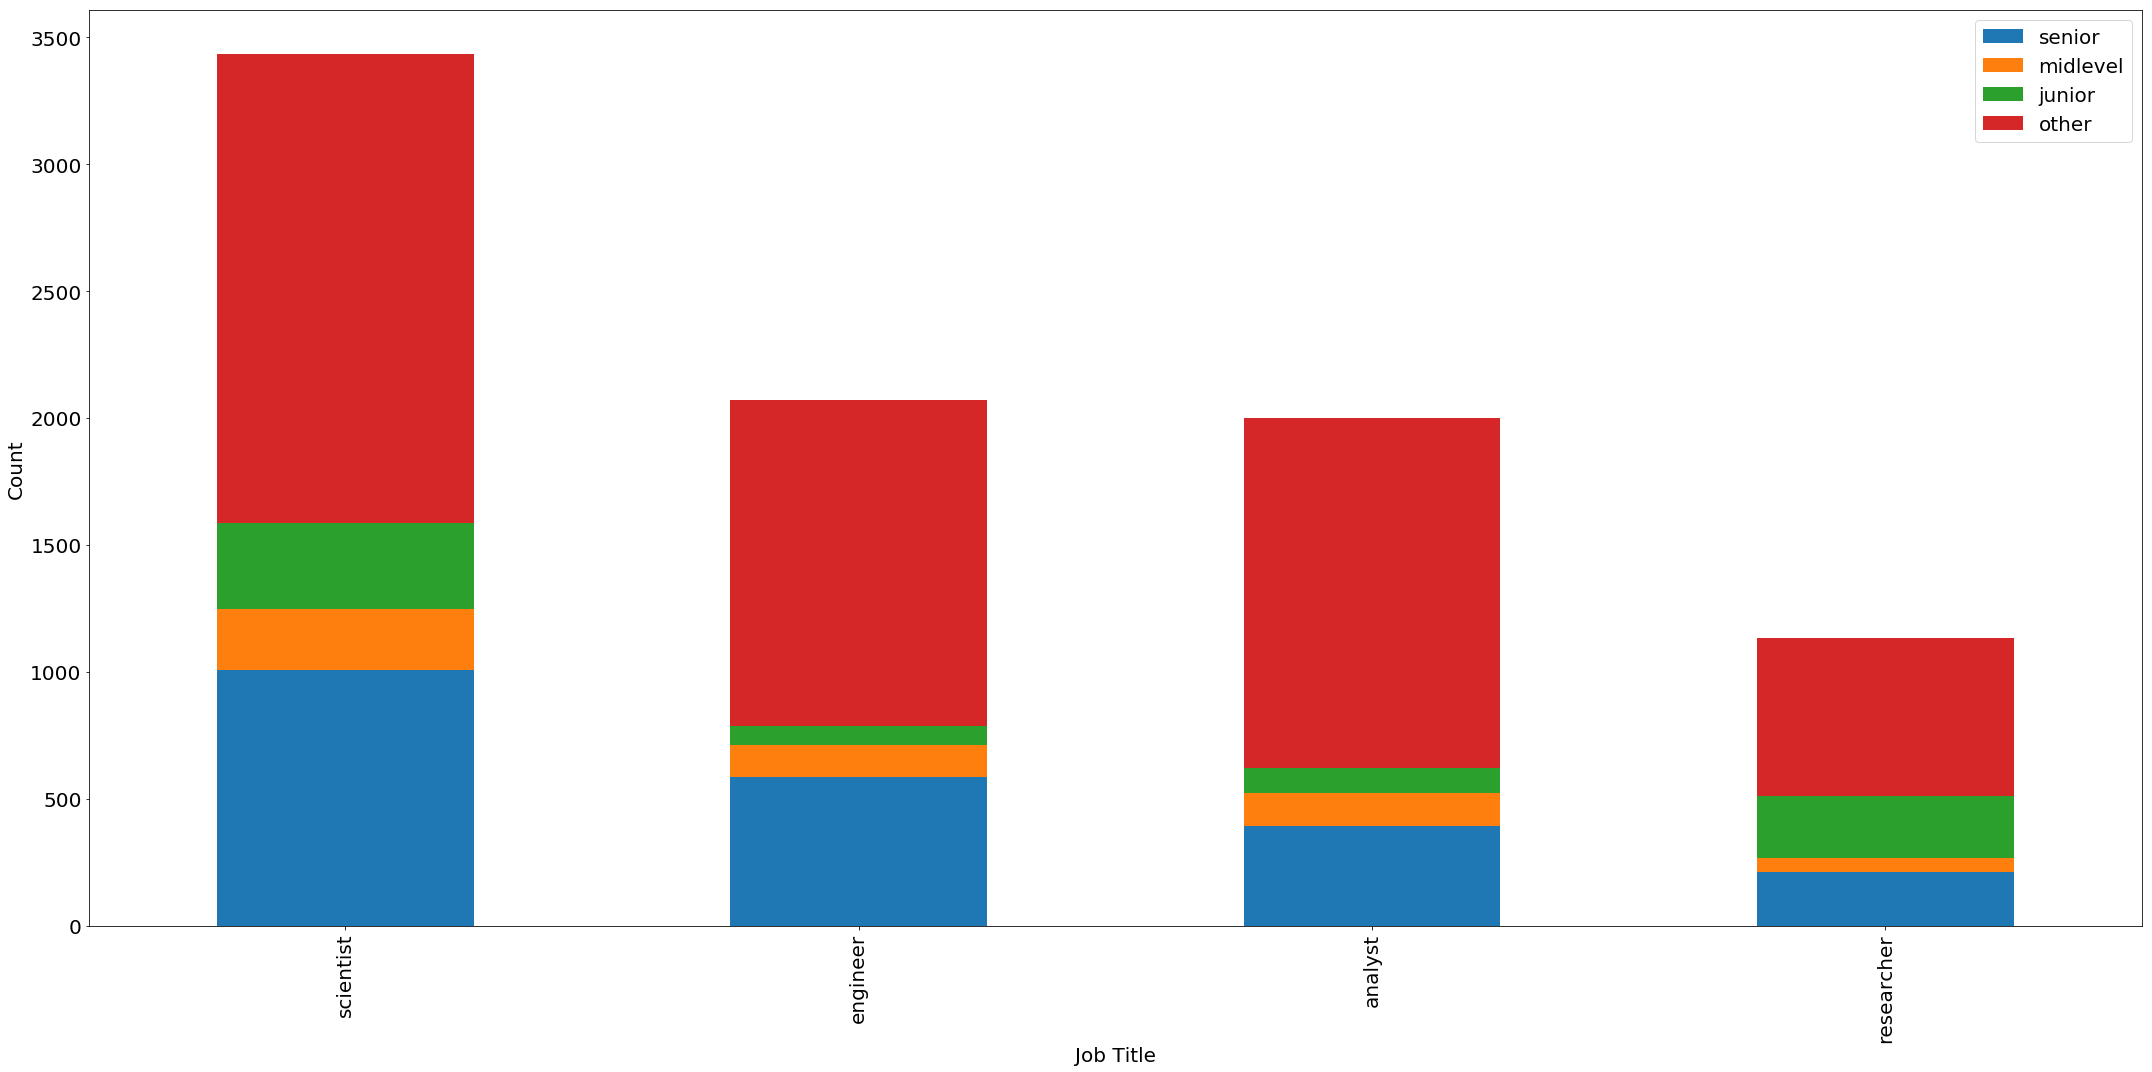

In [21]:
job_type_count_frame = pd.DataFrame.from_dict([job_type_count]).T.reset_index()
job_type_count_frame = job_type_count_frame.rename(columns={0:"Total","index":"Job"})
# job_type_count
stacked_bar_merged_frame = job_type_count_frame.merge(stack_bar_frame, how="inner", on="Job")
stacked_bar_merged_frame["other"] = stacked_bar_merged_frame["Total"] - (stacked_bar_merged_frame["senior"]+stacked_bar_merged_frame["midlevel"]+stacked_bar_merged_frame["junior"])

stacked_bar_merged_frame[["senior","midlevel","junior","Total"]].astype(int)
stacked_bar_merged_frame.dtypes
stacked_bar_merged_frame = stacked_bar_merged_frame.set_index("Job")
stacked_bar_merged_frame = stacked_bar_merged_frame.sort_values(by="Total", ascending= False)
stacked_bar_merged_frame_top = stacked_bar_merged_frame.head(4)
stacked_bar_merged_frame_top = stacked_bar_merged_frame_top[["senior","midlevel","junior","other"]]
stacked_bar_merged_frame_top.plot.bar(figsize=barchart_size,stacked = True)
plt.tight_layout()
plt.xticks(rotation=90,size=fontvalue)
plt.yticks(size=fontvalue)
plt.xlabel("Job Title",size = fontvalue)
plt.ylabel("Count", size = fontvalue)
plt.tight_layout()
plt.legend(fontsize = fontvalue)
plt.savefig("graphs/StackedBarOfJobTypesTop4.jpg")
plt.show()

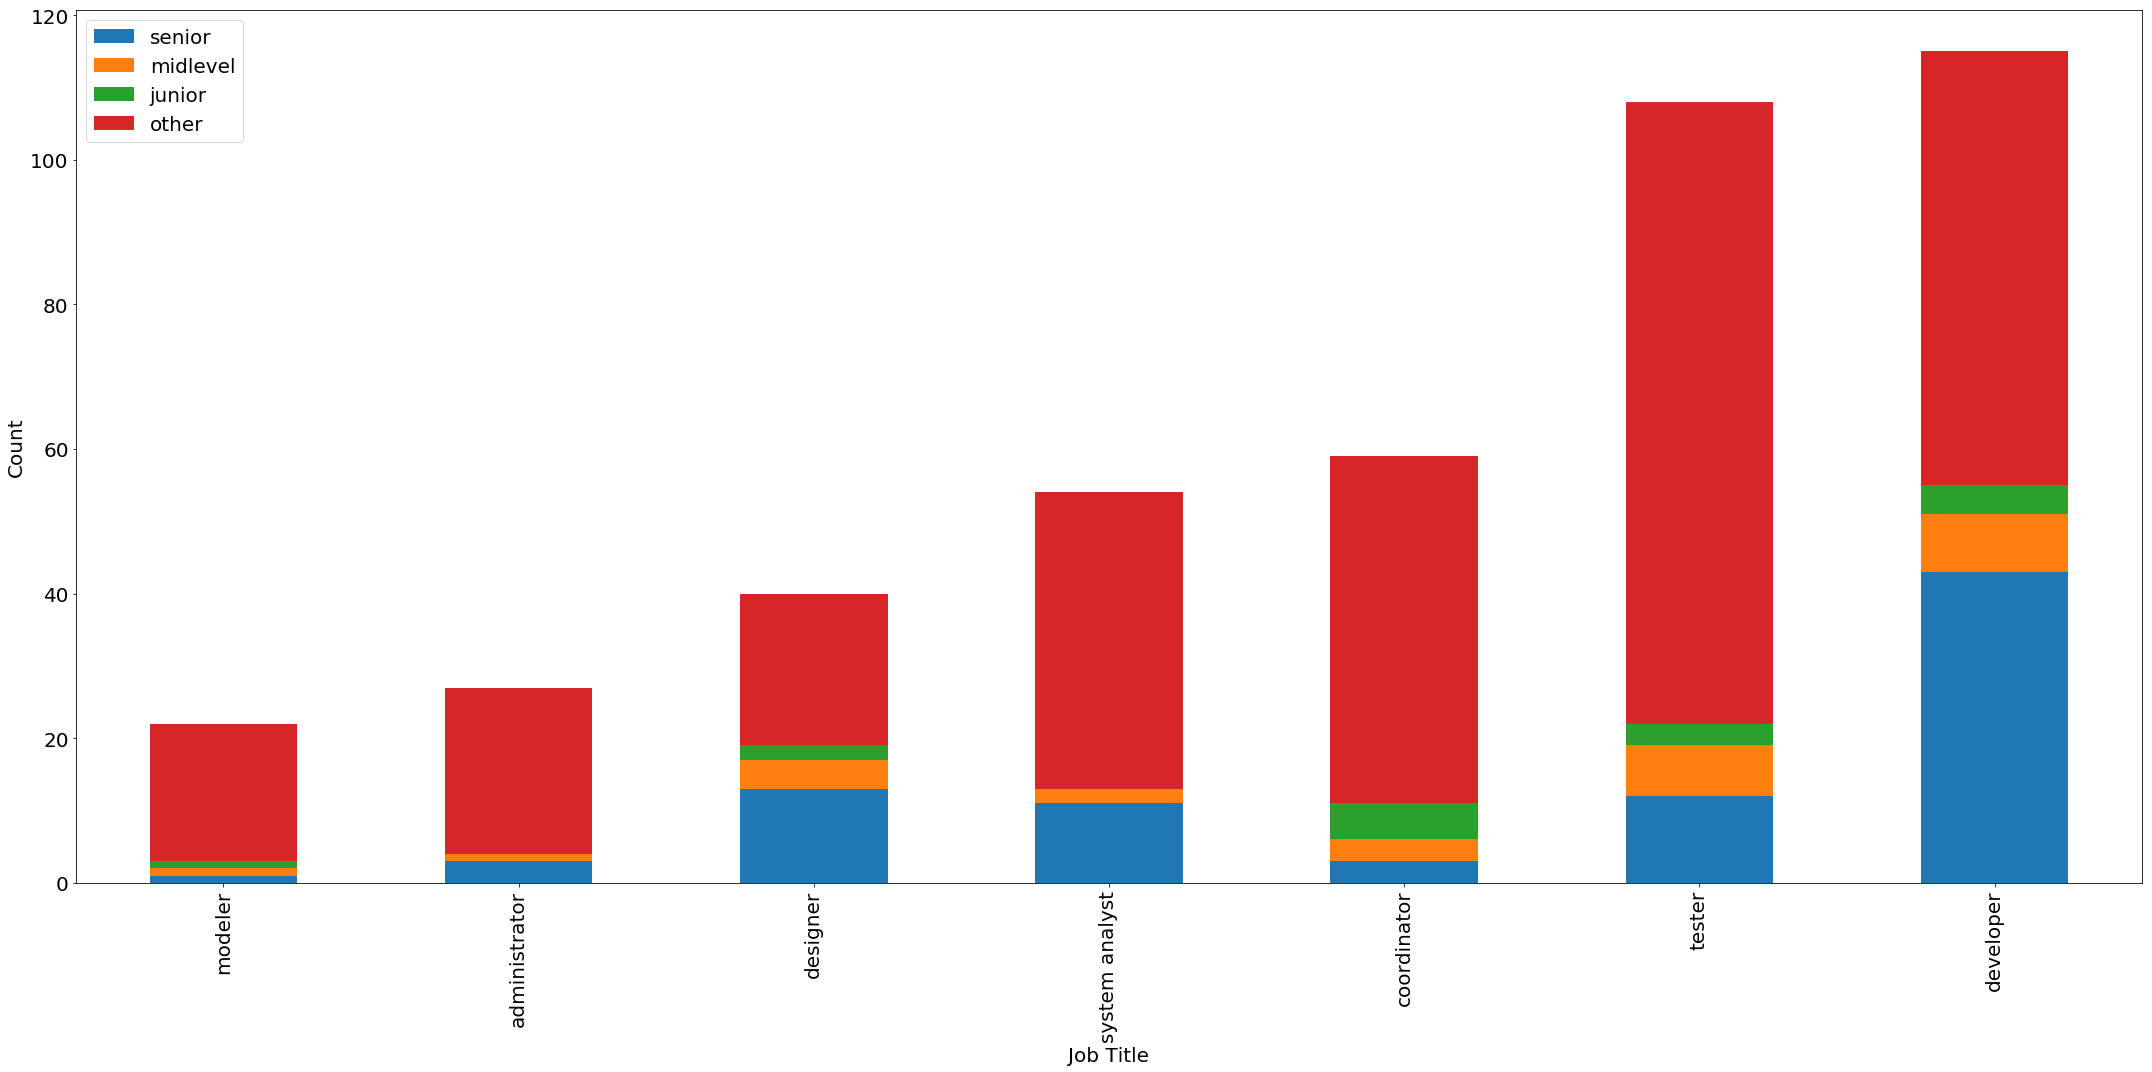

In [22]:
job_type_count_frame = pd.DataFrame.from_dict([job_type_count]).T.reset_index()
job_type_count_frame = job_type_count_frame.rename(columns={0:"Total","index":"Job"})
# job_type_count
stacked_bar_merged_frame = job_type_count_frame.merge(stack_bar_frame, how="inner", on="Job")
stacked_bar_merged_frame["other"] = stacked_bar_merged_frame["Total"] - (stacked_bar_merged_frame["senior"]+stacked_bar_merged_frame["midlevel"]+stacked_bar_merged_frame["junior"])

stacked_bar_merged_frame[["senior","midlevel","junior","Total"]].astype(int)
stacked_bar_merged_frame.dtypes
stacked_bar_merged_frame = stacked_bar_merged_frame.set_index("Job")
# stacked_bar_merged_frame = stacked_bar_merged_frame.T
# stacked_bar_merged_frame = stacked_bar_merged_frame[["senior","midlevel","junior","other"]]
# stacked_bar_merged_frame
# stacked_bar_merged_frame.plot.bar(stacked = True)
# stacked_bar_merged_frame
stacked_bar_merged_frame = stacked_bar_merged_frame.sort_values(by="Total", ascending= True)
stacked_bar_merged_frame_top = stacked_bar_merged_frame.head(11-4)
stacked_bar_merged_frame_top = stacked_bar_merged_frame_top[["senior","midlevel","junior","other"]]
stacked_bar_merged_frame_top.plot.bar(figsize=barchart_size,stacked = True)
plt.xticks(rotation=90,size=fontvalue)
plt.yticks(size=fontvalue)
plt.xlabel("Job Title",size = fontvalue)
plt.ylabel("Count", size = fontvalue)
plt.tight_layout()
plt.legend(fontsize = fontvalue)
plt.savefig("graphs/StackedBarOfJobTypessmallgroup.jpg")
plt.show()
# print(len(stacked_bar_merged_frame))

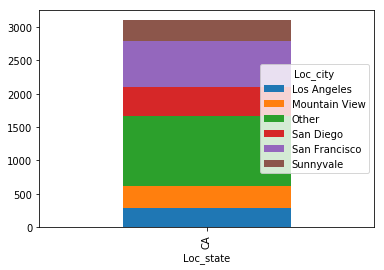

In [23]:
#StackedBar Graph

top_10_states = count_for_state.head(10)
merged_dataset_stacked_bar_grouped_count_framed = merged_dataset_stacked_bar_grouped_count.to_frame()
merged_dataset_stacked_bar_grouped_count_framed = merged_dataset_stacked_bar_grouped_count_framed.reset_index()
joined_frame = merged_dataset_stacked_bar_grouped_count_framed.merge(top_10_states, on ="Loc_state", how="right")
ca_frame = joined_frame.loc[joined_frame["Loc_state"] == "CA"]
ca_frame = ca_frame[["Loc_state","Loc_city","Position_x","Position_y"]].sort_values(by = "Position_x", ascending=False)
new_frame = ca_frame.head(5)
new_frame
difference = new_frame["Position_y"].max() - new_frame["Position_x"].sum()
toappend = [{"Loc_state":"CA",
            "Loc_city": "Other",
            "Position_x": difference,
           "Position_y":new_frame["Position_y"].max()}]
new_frame = new_frame.append(toappend, ignore_index=True).sort_values(by ="Position_x",ascending=False)
new_frame
new_frame = new_frame.pivot(index = "Loc_state", columns= "Loc_city", values = "Position_x")
new_frame
new_frame.plot.bar(stacked= True,legend=True)



##MISC FOR NY
# ny_frame = joined_frame.loc[joined_frame["Loc_state"] == "NY"]
# ca_frame = ca_frame.set_index(["Loc_state","Loc_city"])
# ny_frame = ny_frame[["Loc_state","Loc_city","Position_x","Position_y"]].sort_values(by = "Position_x", ascending=False)
# # ca_frame.dtypes
# ca_frame.head(10).plot.bar(x = "Loc_city",stacked = True, legend=False)
# plt.show()
# new1_frame = ny_frame.head(5)
# new1_frame
# difference = new1_frame["Position_y"].max() - new1_frame["Position_x"].sum()
# toappend = [{"Loc_state":"NY",
#             "Loc_city": "Other",
#             "Position_x": difference,
#            "Position_y":new1_frame["Position_y"].max()}]
# new1_frame = new1_frame.append(toappend, ignore_index=True).sort_values(by ="Position_x",ascending=False)
# new1_frame
# new1_frame = new1_frame.pivot(index = "Loc_state", columns= "Loc_city", values = "Position_x")
# new1_frame
# new1_frame.plot.bar(stacked= True,legend=False)

# plt.show()
# merged_dataset_stacked_bar_grouped = merged_dataset_stacked_bar.groupby(["Loc_state","Loc_city"])
# # merged_dataset_stacked_bar_grouped_count = merged_dataset_stacked_bar_grouped.count()
# # merged_dataset_stacked_bar_grouped_count = merged_dataset_stacked_bar_grouped_count["Position"]

# merged_dataset_stacked_bar_grouped_count_sorted = merged_dataset_stacked_bar_grouped_count.sort_values(ascending=False)
# merged_dataset_stacked_bar_grouped_count_sorted_head = merged_dataset_stacked_bar_grouped_count_sorted.head(10)
# merged_dataset_stacked_bar_grouped_count_sorted_head

##Not a good way to display this type of data, since all the legends for each state will be different => too complex

In [24]:
tool_count

{'sql': 4199,
 'sas': 867,
 'excel': 1352,
 'html': 414,
 'css': 372,
 'python': 3987,
 'linux': 982,
 'tableau': 853,
 'c': 1321,
 'java': 2099,
 'api': 451,
 'java script': 25,
 'json': 184,
 'aws': 999,
 'spark': 1312,
 'mongodb': 286,
 'r': 2147,
 'hadoop': 1748,
 'hive': 808,
 'c++': 1166,
 'mysql': 540,
 'matlab': 1242,
 'vba': 152,
 'nosql': 629,
 'scala': 661,
 'ajax': 76,
 'd3': 174,
 'numpy': 171,
 'pandas': 201,
 'matplotlib': 50,
 'leaflet': 5}

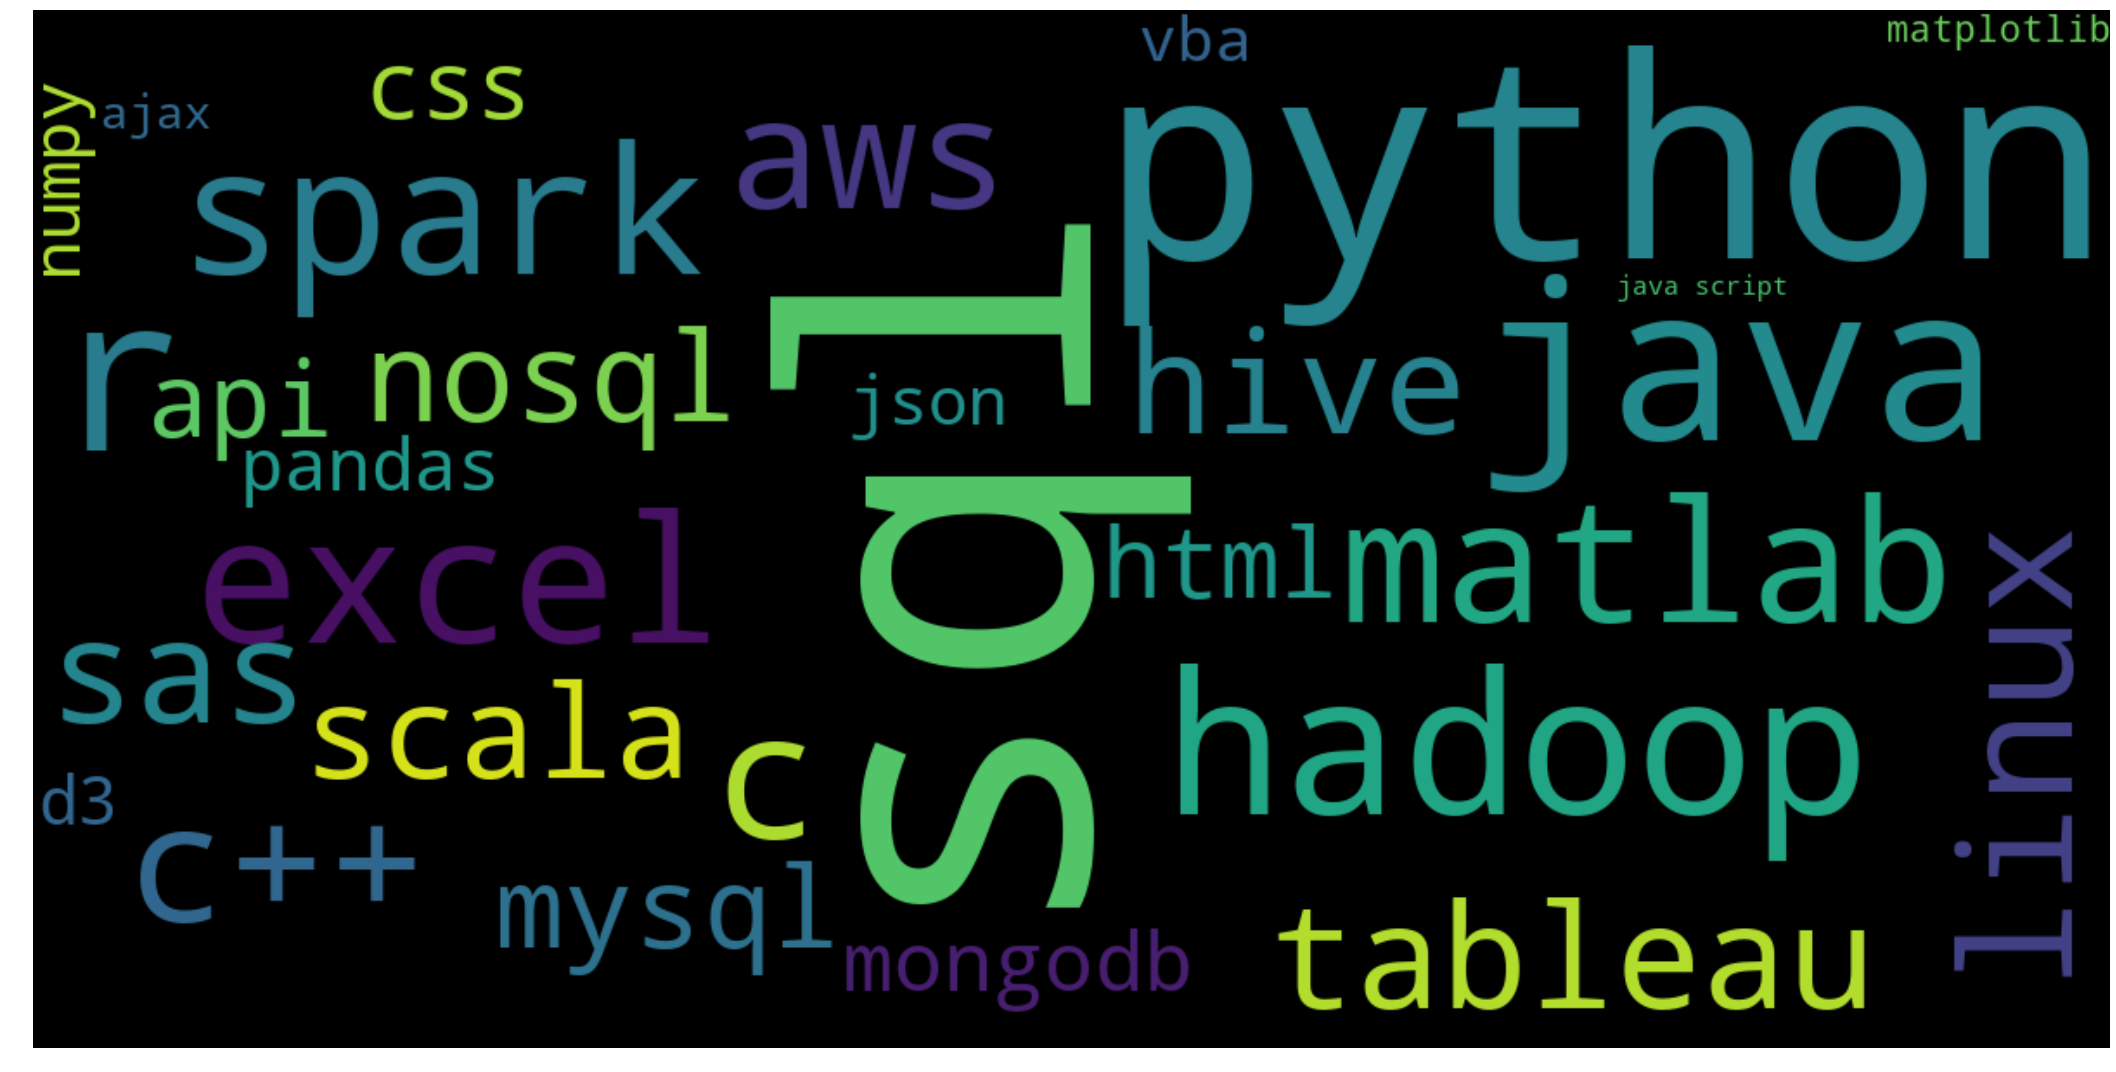

In [25]:
plt.figure(figsize=wordcloud_size)
wordcloud = WordCloud(scale=3,relative_scaling=.5).generate_from_frequencies(tool_count)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.savefig("graphs/ToolsTargetedWordCloud.jpg")
plt.show()


In [26]:
# count_for_state = count_for_state_store
# count_for_state_total = count_for_state["Position"].sum()
# count_for_state_total
# top10_states_total = count_for_state["Position"].head(10).sum()
# top10_states_total
# top10_others = count_for_state_total - top10_states_total
# top10_others

In [27]:
# skill_count

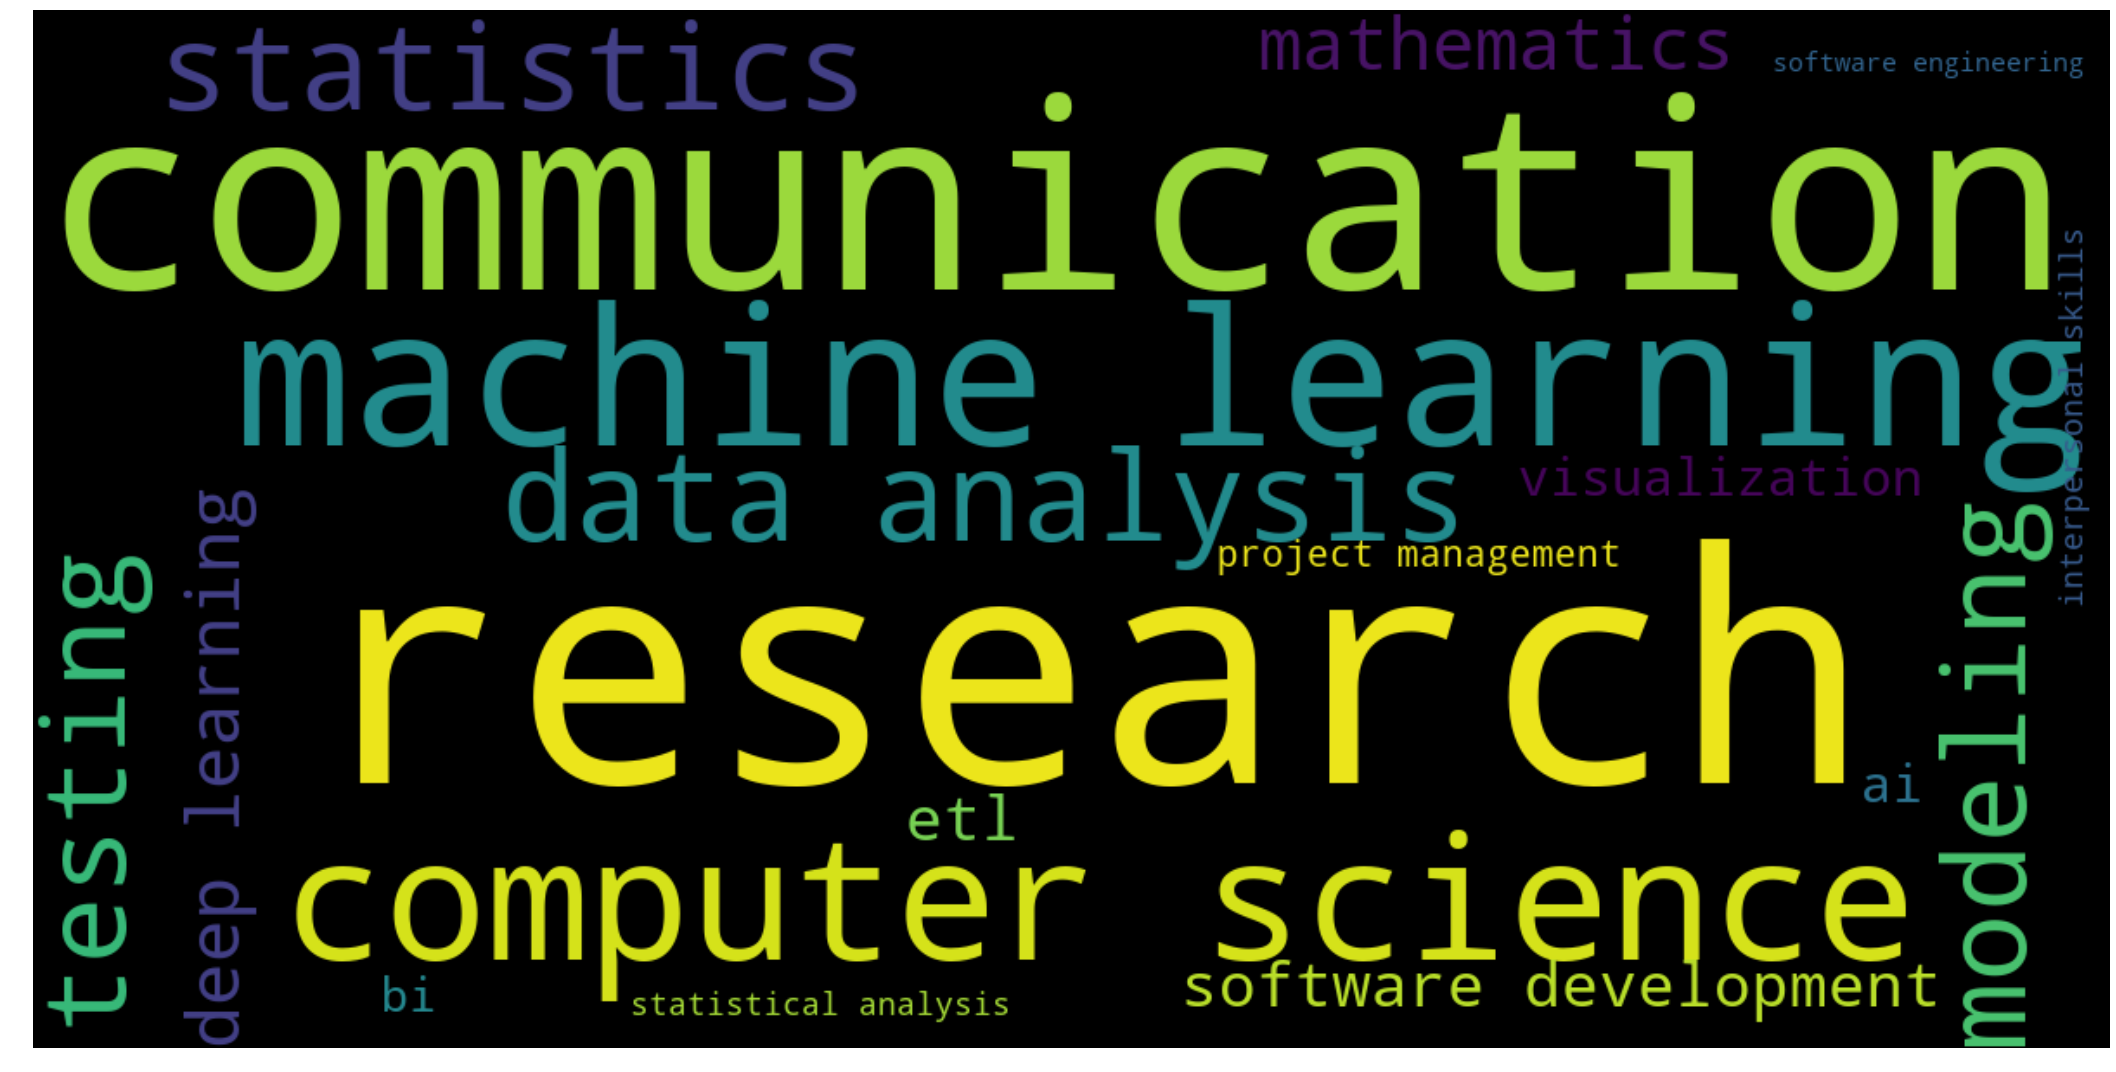

In [28]:
plt.figure(figsize=wordcloud_size)
wordcloud = WordCloud(scale=3,relative_scaling=1).generate_from_frequencies(skill_count)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.savefig("graphs/SkillsTargetedWordCloud.jpg")
plt.show()


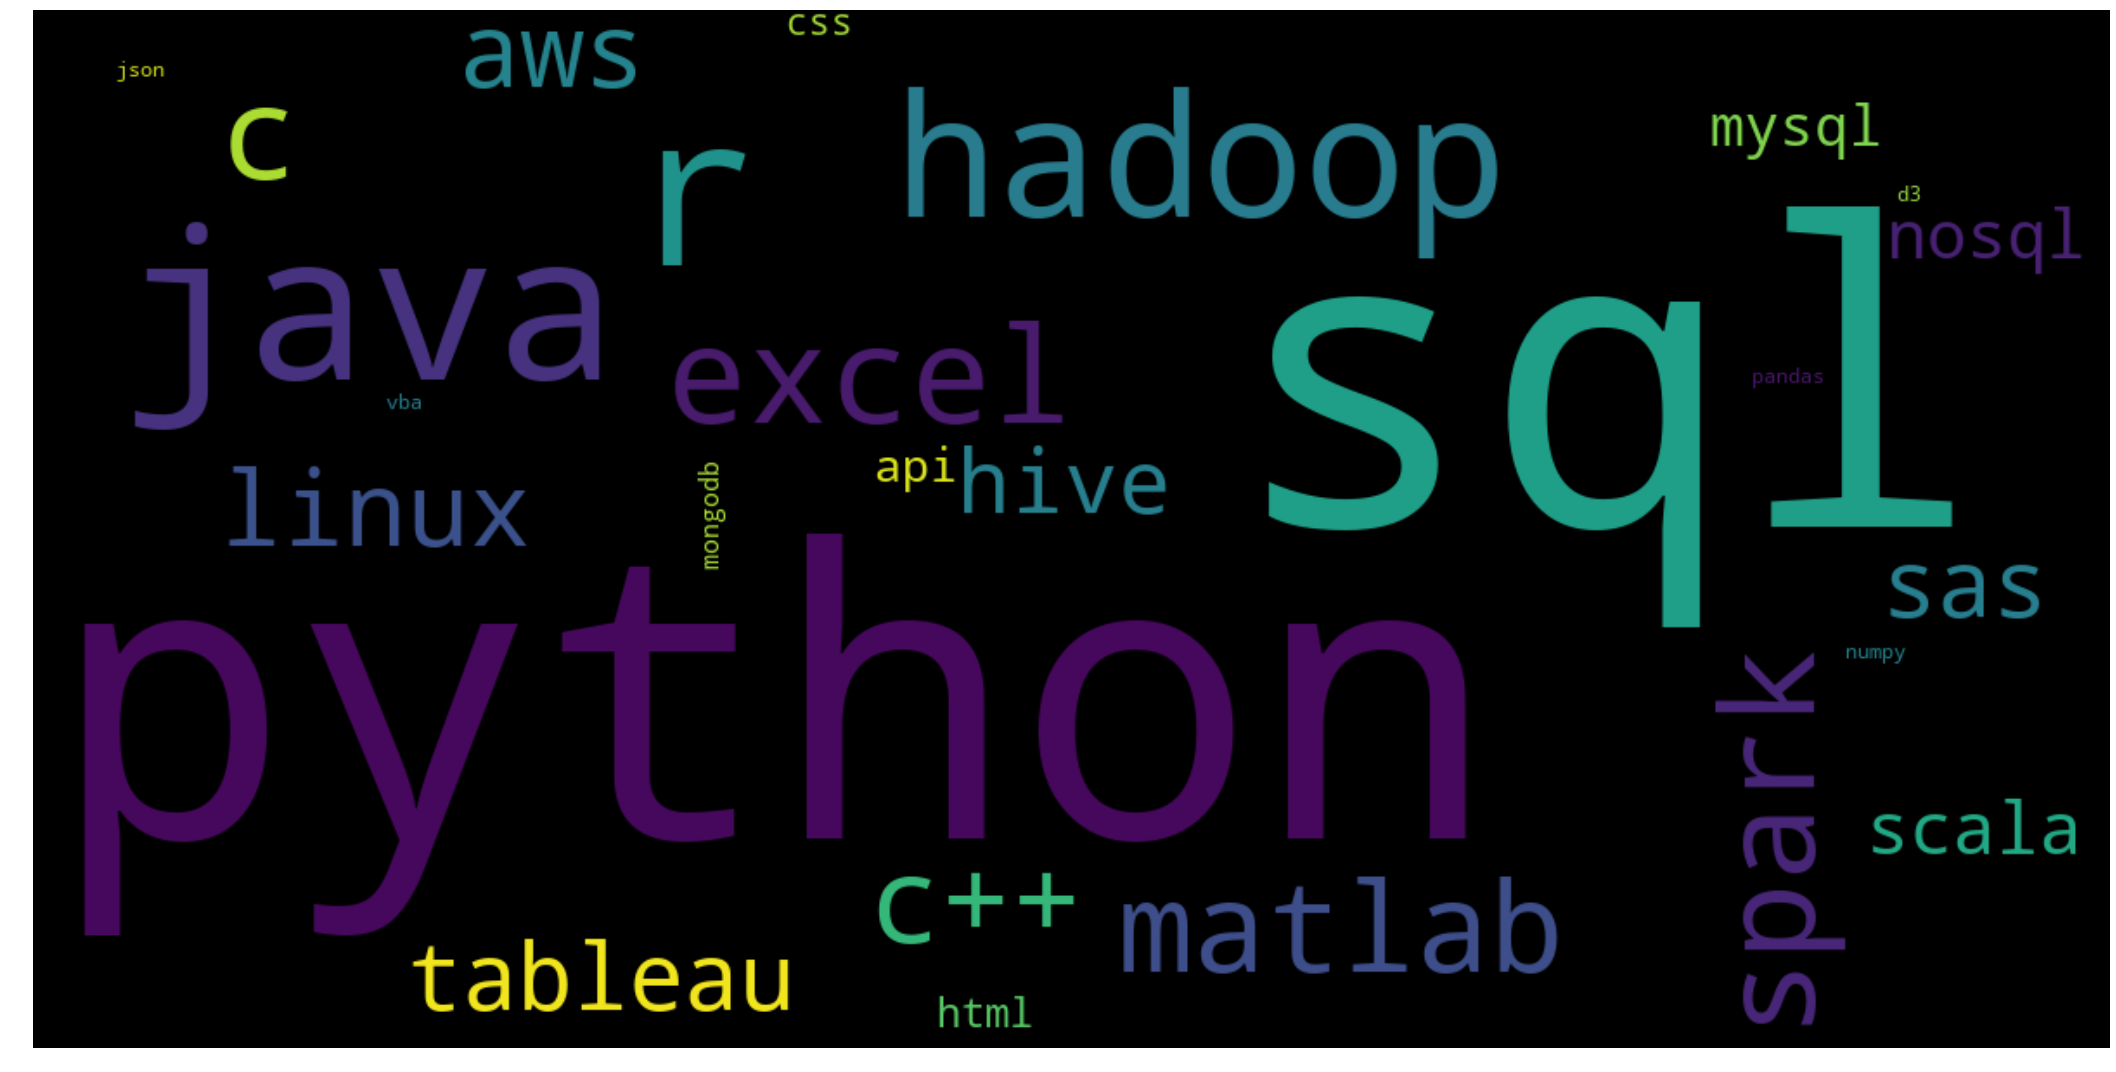

In [29]:
plt.figure(figsize=wordcloud_size)
wordcloud = WordCloud(scale=3,relative_scaling=1).generate_from_frequencies(tool_count)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.savefig("graphs/ToolsTargetedWordCloud.jpg")
plt.show()
    

In [30]:
# tool_count

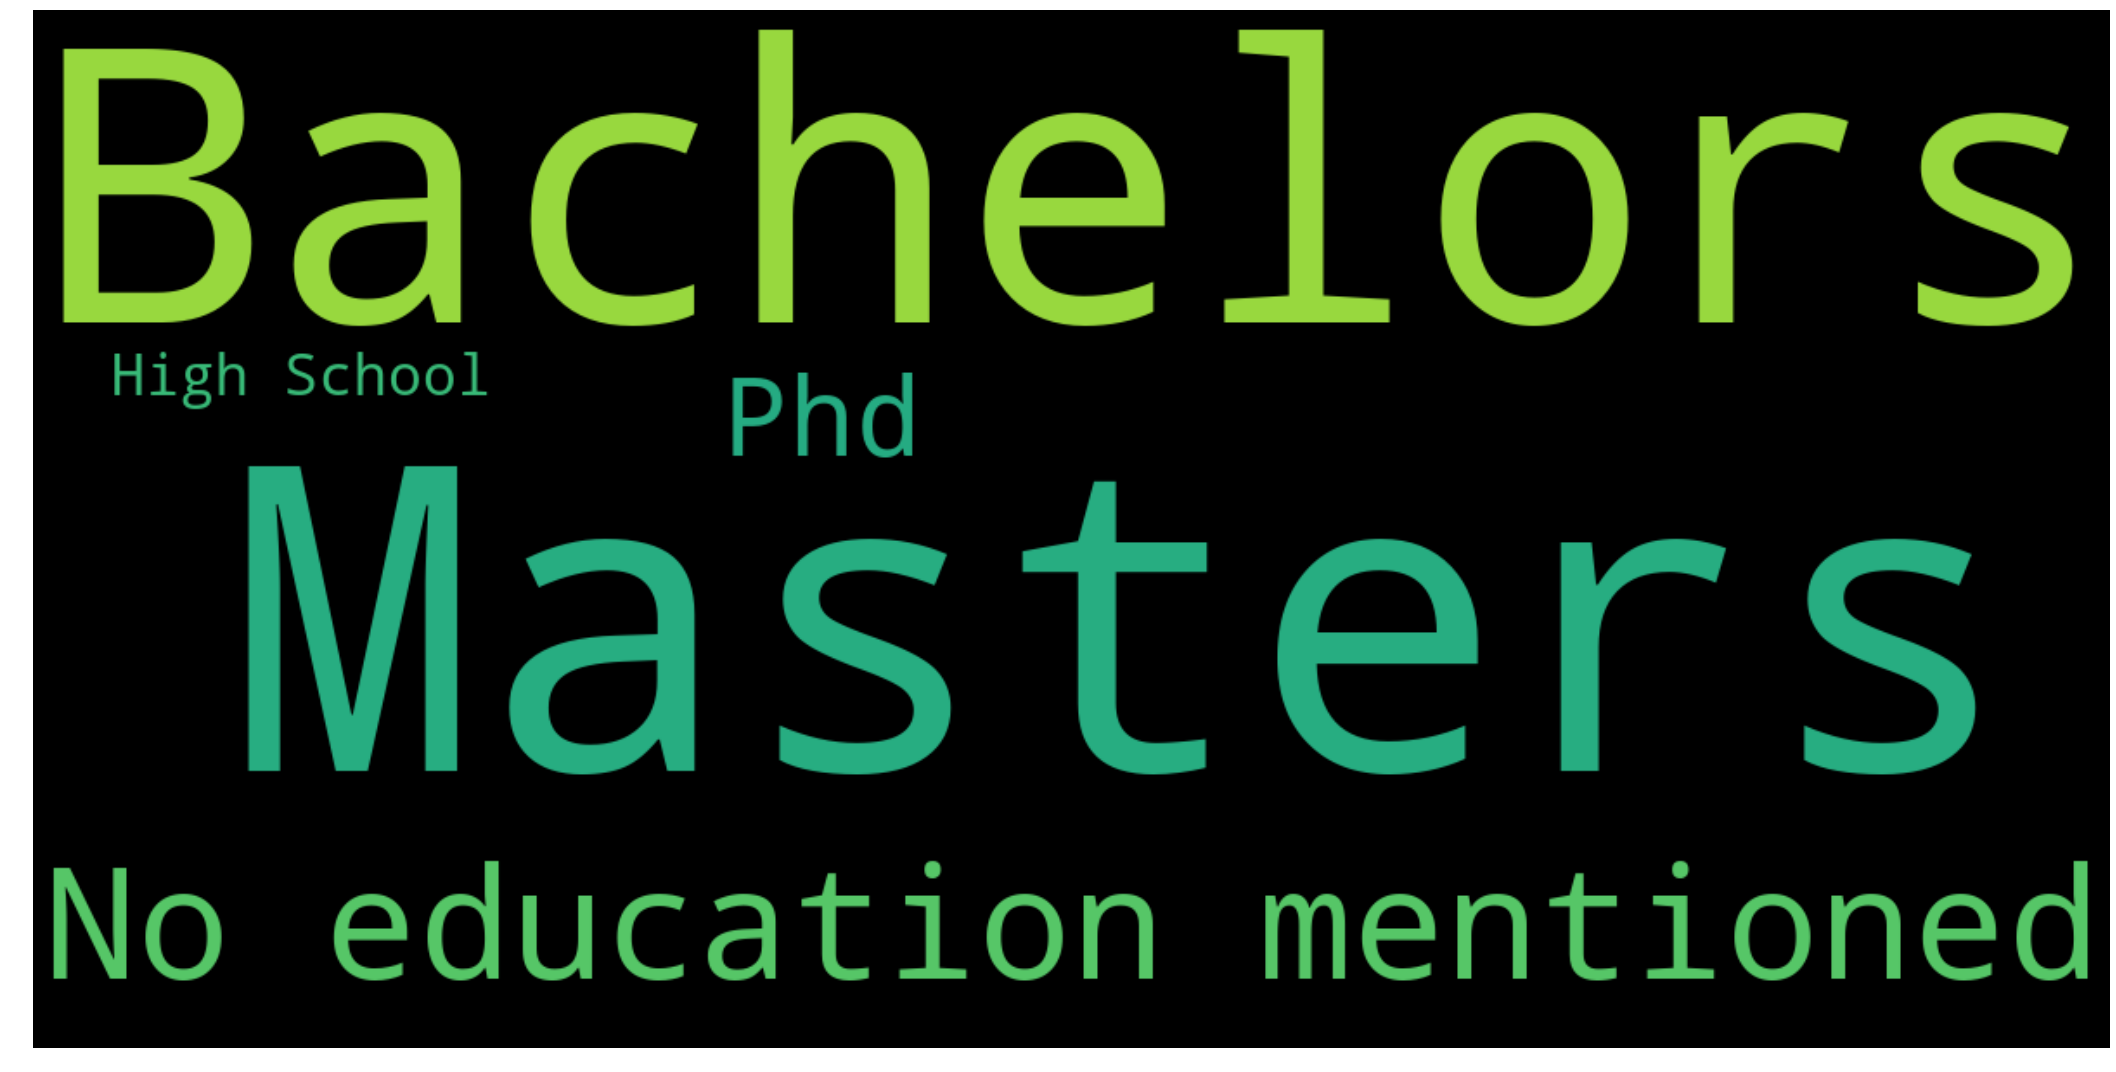

In [31]:
plt.figure(figsize=wordcloud_size)    
wordcloud = WordCloud(scale=3).generate_from_frequencies(education_count)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout()
plt.savefig("graphs/EduTargetedWordCloud.jpg")
plt.show()
    